In [ ]:
"""
1) Acentric Factor (OMEGA)
2) Critical Compressibility Factor (ZC)
3) Critical Density (Liquid vs Gas): Critical volume (VC)
4) Critical Pressure (Liquid vs Gas): Critical pressure (PC)
5) Critical Temperature (TC)
6) Density (Crystal 1 vs Gas): ThermoML polynomials for solid molar density (DNSTMLPO)
7) Density (Liquid vs Gas): COSTALD parameters for liquid molar volume (DNLCOSTD)
8) Enthalpy of Phase Transition: Heat of fusion (HFUS)
9) Enthalpy of Vaporization or Sublimation: TDE Watson equation for heat of vaporization (DHVLTDEW)
10) Gibbs Energy: Gibbs energy of formation (ideal gas) (DGFORM)
11) Heat Capacity (Crystal 1 vs Gas): ThermoML polynomials for solid Cp (CPSTMLPO)
12) Heat Capacity (Ideal Gas): TDE Aly-Lee ideal gas Cp (CPIALEE)
13) Heat Capacity (Liquid vs Gas): TDE equation for liquid Cp (CPLTDECS)
14) Heat of Formation (Ideal gas) (DHFORM)
15) Molecular Weight (MW)
16) Normal Boiling Point (TB)
17) Normal Melting Temperature: Freeze Point Temperature (FREEZEPT)
18) Surface Tension (Liquid vs Gas): TDE Watson equation for liquid-gas surface tension (SIGTDEW)
19) Thermal Conductivity (Gas): ThermoML polynomials for vapor thermal conductivity (KVTMLPO)
20) Triple Point Temperature (TPT)
21) Vapor Pressure (Crystal 1 vs Gas): TDE polynomials for solid vapor pressure (PSTDEPOL)
22) Vapor Pressure (Liquid vs Gas): TDE Wagner 25 liquid vapor pressure (WAGNER25)
23) Viscosity (Gas): ThermoML polynomials for vapor viscosity (MUVTMLPO)
24) Viscosity (Liquid vs Gas): TDE equation for liquid viscosity (MULNVE)
"""

'\n1) Acentric Factor (OMEGA)\n2) Critical Compressibility Factor (ZC)\n3) Critical Density (Liquid vs Gas): Critical volume (VC)\n4) Critical Pressure (Liquid vs Gas): Critical pressure (PC)\n5) Critical Temperature (TC)\n6) Density (Crystal 1 vs Gas): ThermoML polynomials for solid molar density (DNSTMLPO)\n7) Density (Liquid vs Gas): COSTALD parameters for liquid molar volume (DNLCOSTD)\n8) Enthalpy of Phase Transition: Heat of fusion (HFUS)\n9) Enthalpy of Vaporization or Sublimation: TDE Watson equation for heat of vaporization (DHVLTDEW)\n10) Gibbs Energy: Gibbs energy of formation (ideal gas) (DGFORM)\n11) Heat Capacity (Crystal 1 vs Gas): ThermoML polynomials for solid Cp (CPSTMLPO)\n12) Heat Capacity (Ideal Gas): TDE Aly-Lee ideal gas Cp (CPIALEE)\n13) Heat Capacity (Liquid vs Gas): TDE equation for liquid Cp (CPLTDECS)\n14) Heat of Formation (Ideal gas) (DHFORM)\n15) Molecular Weight (MW)\n16) Normal Boiling Point (TB)\n17) Normal Melting Temperature: Freeze Point Temperature

The DIPPR ideal gas heat capacity equation by Aly and Lee 1981.

\begin{equation}
C_p^{*,ig} = C_{1i} + C_{2i}\left(\frac{C_{3i}/T}{\sinh\left(\frac{C_{3i}}{T}\right)}\right)^2 + C_{4i}\left(\frac{C_{5i}/T}{\cosh\left(\frac{C_{5i}}{T}\right)}\right)^2
\end{equation}

Parameter 1: 38321.389 ± 510.704
Parameter 2: -72.096 ± 4.520
Parameter 3: 0.281 ± 0.013
Parameter 4: -0.000 ± 0.000
Parameter 5: 0.000 ± 0.000


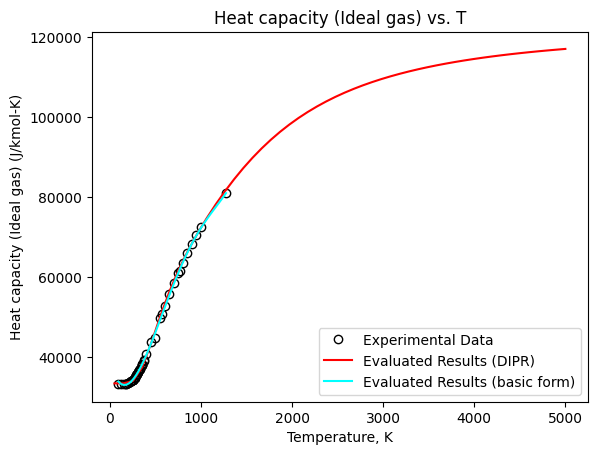

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy.optimize import curve_fit

data_ch4 = """
93.17	33262.8
173.19	33304.6
298.14	35647.7
373.12	39036.7
573.18	50668.2
773.15	61588.5
1274.2	81002.2
200.05	33490
250.02	34290
299.99	35870
349.97	38180
399.98	40850
449.99	43800
500.01	44830
550.03	49850
600.04	52800
650.03	55660
700.02	58420
750	61060
800	63590
850.02	66000
900.07	68290
950.41	70430
1000.8	72500
232.1	33940.06365742
232.1	33936.036358258
250	34272.98705451
250	34274.329487563
270.42	34775.72823278
270.42	34789.15256331
290.02	35397.27473623
290.02	35406.000551074
309.72	36138.29778138
309.72	36140.982647482
331.36	37071.28875307
331.36	37073.973619178
350.37	38000.25242561
350.37	37994.882693398
125	33284.896008
150	33302.542714
175	33374.733784
200	33528.7414
225	33803.067466
250	34263.486068
275	34932.45665
300	35777.894292
325	36794.986256
350	37954.856114
375	39230.231684

"""

array_data = np.array([list(map(float, line.split())) for line in data_ch4.strip().split('\n')])

# Independent variable
T = array_data[:, 0]

# Dependent variable
Cp = array_data[:, 1]

def heat_cap(T, *params):
    powers = np.array([T**i for i in range(len(params))])
    return np.dot(params, powers)

params_number = 5
params, pcov = curve_fit(heat_cap, T, Cp, p0 = np.random.randn(params_number))

def calc_heat_cap_DIPR(T, *coeffs):
    c1, c2, c3, c4, c5 = coeffs

    return c1 + c2 * (c3/T / (np.sinh(c3/T)))**2 + c4 * (c5/T / (np.cosh(c5/T)))**2


"""
MOLECULE: CH4
Name	  Description			            Value		  Units
CPIALEE	TDE Aly-Lee ideal gas Cp	  -		      J/kmol-K
c1					                        33407.17	J/kmol-K
c2					                        88543.63	J/kmol-K
c3					                        2647.59	  K
c4				                          60376.49	J/kmol-K
c5					                        1136.589	K
c6				                          0		      Unitless
R					                          8.31447		J/mol-K
Tlower					                    50		    K
Tupper					                    5000		  K
"""

ch4_coeffs_Cp = (33407.17, 88543.63, 2647.59, 60376.49, 1136.589)

# Create plots
plt.plot(T, Cp, 'ko', mfc = 'None', label = 'Experimental Data')

T_aspen = np.linspace(50, 5000)
plt.plot(T_aspen, calc_heat_cap_DIPR(T_aspen, *ch4_coeffs_Cp), 'r', label = 'Evaluated Results (DIPR)')

T_test = np.linspace(min(T), max(T))
plt.plot(T_test, heat_cap(T_test, *params), '-', color = 'cyan', label = 'Evaluated Results (basic form)')
plt.xlabel('Temperature, K')
plt.ylabel('Heat capacity (Ideal gas) (J/kmol-K)')
plt.title('Heat capacity (Ideal gas) vs. T')

plt.legend()

# Calculate the standard deviations from the diagonal of the covariance matrix
param_errors = np.sqrt(np.diag(pcov))

# Display the fitted parameters and their uncertainties
for i, param in enumerate(params):
    print(f"Parameter {i + 1}: {param:.3f} ± {param_errors[i]:.3f}")

Heat capacity (Liquid vs. Gas)

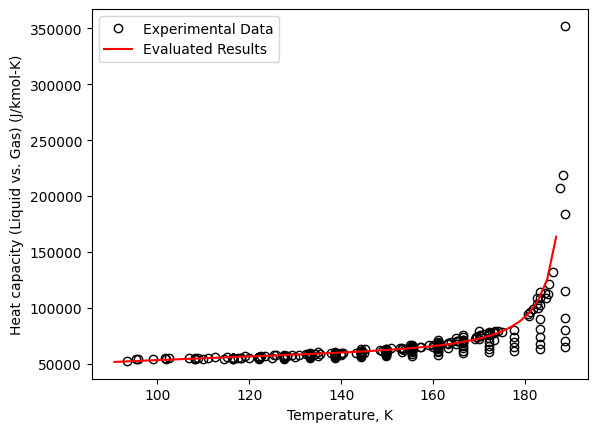

In [ ]:
data_ch4 = """
110.95	55228.8
117.53	55521.7
121.82	55479.8
129.32	57613.7
134.28	58785.2
140.5	59998.6
149.52	61839.5
153.72	62634.5
154.77	63889.7
160.98	66985.8
169.05	72383.2
180.9	92801.1
182.86	100081
184.47	108826
188.28	218991
114.51	54852.2
125.49	57864.7
134.92	60668
145.13	62969.2
155.04	66651.1
165	73178.2
182.61	108784
187.52	206940.6
93.411	52935.97
95.41	54240
95.854	54131
99.03	54647
101.66	54877
101.97	54790
102.58	54896
106.9	55602
108.23	55583
108.81	55315
112.62	56075
115.18	56434
119.13	56810
122.49	57287
123.38	56996
125.78	57645
130.78	58245
132.29	58774
132.77	58879
135.47	58930
137.82	59729
139.98	59698
144.32	60560
144.42	60929
148.51	62033
148.9	62005
150.84	64014
152.82	63898
153.17	64048
155.56	65246
157.06	65435
157.37	65569
159.14	66905
161.19	67733
161.5	67898
163.15	68379
163.8	69936
165.14	70865
165.26	70534
165.56	70745
166.56	71756
169.27	73960
169.58	74411
170.17	74696
170.21	75369
170.26	75575
171.11	76320
173.19	78540
173.49	79194
173.52	78678
174.04	79623
180.63	95067
181.05	96349
181.66	98844
182.58	103442
184.23	113330
185.28	121769
186.14	132153
116.49	55412.42151
116.49	55345.25494
116.49	55345.25494
116.49	55278.08837
116.49	55210.9218
116.49	55143.75522
116.49	55076.58865
116.49	55076.58865
116.49	55009.42208
116.49	54942.25551
116.49	54875.08894
116.49	54539.25608
116.49	54001.92351
122.04	56554.25323
122.04	56487.08666
122.04	56419.92008
122.04	56285.58694
122.04	56151.2538
122.04	56016.92065
122.04	55949.75408
122.04	55949.75408
122.04	55815.42094
122.04	55681.0878
122.04	55412.42151
122.04	54875.08894
122.04	54337.75637
127.59	57897.58466
127.59	57494.58523
127.59	57427.41866
127.59	57360.25208
127.59	57024.41923
127.59	56957.25266
127.59	56890.08608
127.59	56755.75294
127.59	56487.08666
127.59	56352.75351
127.59	56016.92065
127.59	55345.25494
127.59	54740.7558
133.15	59375.24923
133.15	58770.75009
133.15	58569.25037
133.15	58367.75066
133.15	58031.9178
133.15	57897.58466
133.15	57763.25151
133.15	57696.08494
133.15	57293.08551
133.15	57091.5858
133.15	56688.58637
133.15	55949.75408
133.15	55143.75522
138.71	61121.58009
138.71	60114.08152
138.71	59912.5818
138.71	59643.91552
138.71	59442.4158
138.71	59173.74952
138.71	58972.2498
138.71	58837.91666
138.71	58502.0838
138.71	57830.41809
138.71	57360.25208
138.71	56554.25323
138.71	55546.75465
144.27	63405.24352
144.27	61726.07923
144.27	61591.74609
144.27	60987.24695
144.27	60517.08095
144.27	60382.7478
144.27	60181.24809
144.27	60046.91495
144.27	59711.08209
144.27	58837.91666
144.27	58099.08437
144.27	57360.25208
144.27	56084.08723
149.83	63741.07638
149.83	63673.90981
149.83	62867.91095
149.83	62129.07866
149.83	61793.24581
149.83	61658.91266
149.83	61255.91323
149.83	60920.08038
149.83	59778.24866
149.83	59106.58295
149.83	58233.41751
149.83	56688.58637
155.39	66562.07238
155.39	66360.57267
155.39	65218.74095
155.39	64144.07581
155.39	63875.40952
155.39	63606.74324
155.39	63069.41066
155.39	62397.74495
155.39	61188.74666
155.39	60248.41466
155.39	59308.08266
155.39	57494.58523
160.95	71330.89896
160.95	69853.23439
160.95	68577.06953
160.95	67032.23838
160.95	66897.90524
160.95	66360.57267
160.95	65487.40724
160.95	64614.24181
160.95	63069.41066
160.95	61726.07923
160.95	60517.08095
160.95	58434.91723
166.51	76032.55897
166.51	73748.89554
166.51	71599.56525
166.51	70927.89953
166.51	70659.23325
166.51	69181.56867
166.51	68308.40324
166.51	65756.07353
166.51	63808.24295
166.51	61994.74552
166.51	59509.58237
172.07	78920.72155
172.07	77644.55669
172.07	77174.39069
172.07	75696.72611
172.07	73077.22982
172.07	69651.73467
172.07	66427.73924
172.07	63606.74324
172.07	60718.58066
177.63	80196.8864
177.63	74353.39468
177.63	69718.90125
177.63	65420.24067
177.63	61994.74552
183.19	114384.6713
183.19	109347.1784
183.19	102899.1876
183.19	89734.53956
183.19	81070.05183
183.19	74286.22811
183.19	67771.07067
183.19	63472.41009
188.75	352087.1679
188.75	184439.4054
188.75	115392.1699
188.75	90876.37128
188.75	80465.55269
188.75	70793.56639
188.75	65017.24124
110.01	54063.0902
120.01	55025.6378
130.01	55988.1854
140.01	59036.2528
140.01	58073.7052
150.01	62084.3202
150.01	60800.9234
160.01	67057.4828
160.01	64811.5384
170.01	79410.177
170.01	71870.2208
125.01	55506.9116
135.01	57111.1576
145.01	59357.102
155.01	62565.594
165.01	67699.1812
175.01	78126.7802
185.01	112136.7954
108.15	54399.98186
108.15	54111.21758
118.15	55538.99652
118.15	55105.8501
128.15	57030.9453
128.15	56661.96872
143.15	59373.14446
153.15	63239.37732
153.15	60977.39046
163.15	67699.1812
163.15	64506.73166
173.15	77870.10084
173.15	70971.84304
"""

array_data = np.array([list(map(float, line.split())) for line in data_ch4.strip().split('\n')])

# Independent variable
T = array_data[:, 0]

# Dependent variable
Cp = array_data[:, 1]

def calc_Cp_liq_to_gas(T, *params):

    B, Tc, *C_i = params
    tau = 1 - T / Tc
    Cp_i = B / tau

    for m, C_mi in enumerate(C_i, start = 1):
        Cp_i = Cp_i + C_mi * T**(m-1)

    return Cp_i

# def calculate_Cp_i(T, *params):
#     B, Tc, *C_i = params
#     tau = 1 - T / Tc
#     terms = np.array([T**(m-1) for m in range(1, len(C_i) + 1)])
#     Cp_i = B / tau + np.dot(C_i, terms)
#     return Cp_i


"""
CH4 MOLECULE - LIQUID vs GAS
Name	      Value	       Units
CPLTDECS	  -	           J/kmol-K
c1	        26710.81	   J/kmol-K
c2	        322.92	     J/kmol-K**2
c3	       -1.031597	   J/kmol-K**3
c4	        0	           J/kmol-K**4
B	          2252.97	     J/kmol-K
Tcritical   190.5629	   K
nTerms	    4	           Unitless
Tlower	    90.686	     K
Tupper	    186.7517	   K
"""

Tlower = 90.686
Tupper = 186.7517
# Example usage:
Temp = np.linspace(Tlower, Tupper)

# B, Tc, Cm_i values
ch4_coeffs = np.array([2252.97, 190.563, 26710.8, 322.92, -1.0316, 0])

# Create plots
plt.plot(T, Cp, 'ko', mfc = 'None', label = 'Experimental Data')  # Assuming T and Cp are defined somewhere
plt.plot(Temp, calc_Cp_liq_to_gas(Temp, *ch4_coeffs), 'r', label = 'Evaluated Results')
plt.xlabel('Temperature, K')
plt.ylabel('Heat capacity (Liquid vs. Gas) (J/kmol-K)')

plt.legend()
plt.show()

Heat capacity (Ideal gas)

$$
C_{p,i}^{*,l} = B/\tau + \sum_{m=1}^{nTerms} C_{mi}T^{m-1} \\
\tau = 1 - T/T_{ci}
$$

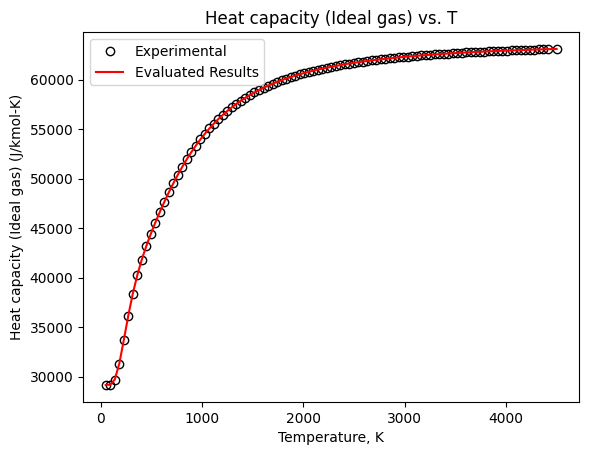

In [ ]:
data_CO2 = """
50	29159.7
94.5	29185.8
139	29689
183.5	31285.6
228	33655.3
272.5	36141.4
317	38363.9
361.5	40236.7
406	41815
450.5	43185.3
495	44418.1
539.5	45558.9
584	46632.6
628.5	47650.5
673	48616.7
717.5	49532
762	50396.2
806.5	51209
851	51970.9
895.5	52683.1
940	53347.2
984.5	53965.3
1029	54539.9
1073.5	55073.7
1118	55569.2
1162.5	56029.2
1207	56456.2
1251.5	56852.8
1296	57221.3
1340.5	57563.9
1385	57882.6
1429.5	58179.4
1474	58456
1518.5	58714
1563	58954.9
1607.5	59180.1
1652	59390.8
1696.5	59588.1
1741	59773.1
1785.5	59946.6
1830	60109.7
1874.5	60263
1919	60407.3
1963.5	60543.2
2008	60671.4
2052.5	60792.3
2097	60906.6
2141.5	61014.7
2186	61116.9
2230.5	61213.8
2275	61305.6
2319.5	61392.7
2364	61475.4
2408.5	61554
2453	61628.7
2497.5	61699.8
2542	61767.5
2586.5	61832
2631	61893.6
2675.5	61952.3
2720	62008.4
2764.5	62062
2809	62113.2
2853.5	62162.2
2898	62209.1
2942.5	62254
2987	62297.1
3031.5	62338.4
3076	62378
3120.5	62416
3165	62452.6
3209.5	62487.7
3254	62521.4
3298.5	62553.9
3343	62585.1
3387.5	62615.1
3432	62644.1
3476.5	62672
3521	62698.9
3565.5	62724.8
3610	62749.8
3654.5	62774
3699	62797.3
3743.5	62819.8
3788	62841.6
3832.5	62862.6
3877	62883
3921.5	62902.7
3966	62921.7
4010.5	62940.2
4055	62958
4099.5	62975.3
4144	62992.1
4188.5	63008.3
4233	63024.1
4277.5	63039.3
4322	63054.2
4366.5	63068.5
4411	63082.5
4500	63109.2
"""

array_data = np.array([list(map(float, line.split())) for line in data_CO2.strip().split('\n')])

# Independent variable
T = array_data[:, 0]

# Dependent variable
Cp = array_data[:, 1]

"""
MOLECULE: CO2
Name	  Description			            Value		  Units
CPIALEE	TDE Aly-Lee ideal gas Cp	  -		      J/kmol-K
c1					                        29159.74	J/kmol-K
c2					                        34619.16	J/kmol-K
c3					                        1372.605	K
c4				                          25336	    J/kmol-K
c5					                        558.4775	K
c6                                  0         Unitless
R 					                        8.31447		J/mol-K
Tlower					                    50		    K
Tupper					                    4500		  K
"""

co2_coeffs = (29159.74, 34619.16, 1372.605, 25336, 558.4775)

# Create plots
plt.plot(T, Cp, 'ko', mfc = 'None', label = 'Experimental')

T_test = np.linspace(min(T), max(T))

T_aspen = np.linspace(50, 4500, 100)

plt.plot(T_aspen, calc_heat_cap_DIPR(T_aspen, *co2_coeffs), 'r', label = 'Evaluated Results')
plt.xlabel('Temperature, K')
plt.ylabel('Heat capacity (Ideal gas) (J/kmol-K)')
plt.title('Heat capacity (Ideal gas) vs. T')
plt.legend()

Thermal conductivity

$$
\lambda_i^{*,v} = \sum_{m=1}^{nTerms} C_{mi}T^{m-1}
$$

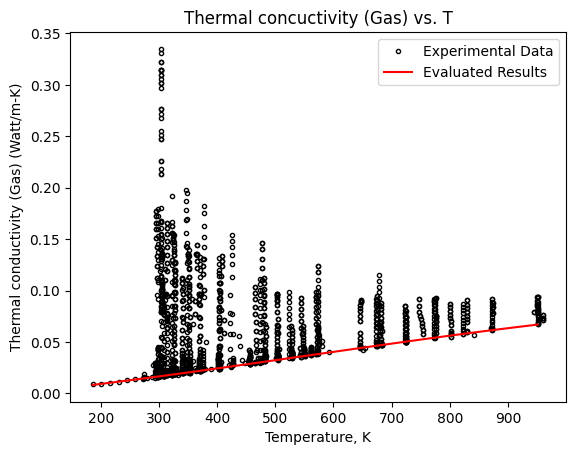

In [ ]:
data_lamba_CO2 = """
186.42	0.00867343
200.91	0.00956044
216.53	0.01056878
230.71	0.01151018
245.59	0.01256037
259.61	0.01358126
274.22	0.01466074
287.74	0.01571092
302.36	0.01686989
311.22	0.01756862
333.84	0.01945142
347.29	0.02063967
363.33	0.02205805
379.47	0.02348898
280.35	0.0154
330.32	0.021
362.12	0.0249
448.14	0.0295
475.15	0.032
310.13	0.0179
310.13	0.0184
359.12	0.0312
443.14	0.0325
326.13	0.1065
357.82	0.0677
439.14	0.04569
467.15	0.0401
356.12	0.09134
437.14	0.0559
466.15	0.04665
273.85	0.0148114
323.13	0.0182004
423.13	0.0268194
273.85	0.0158992
273.85	0.0164013
323.13	0.0197066
273.85	0.0191209
323.13	0.0223007
323.13	0.025104
298.84	0.016747
307.23	0.017561
311.33	0.090481
310.43	0.096296
323.93	0.073385
325.53	0.078154
273.1	0.0142
313.78	0.0175059
321.98	0.0181209
328.28	0.018623
337.27	0.0194138
842.16	0.05702
651.18	0.04262
293.14	0.014644
333.12	0.017573
373.12	0.021338
423.13	0.025941
503.16	0.033054
376.12	0.02230072
593.19	0.0404007
298.28	0.0163285
298.35	0.0163704
303.23	0.0167053
303.24	0.0167053
307.46	0.0170403
313.19	0.0175427
313.19	0.0175008
313.19	0.0175008
322.71	0.0182544
322.75	0.0182963
322.8	0.0182963
348.2	0.0204316
298.28	0.0170403
298.28	0.0183801
298.28	0.0200966
298.28	0.0222738
298.27	0.0251627
298.27	0.0303124
298.22	0.038686
298.21	0.0419099
298.17	0.0422867
298.17	0.044087
303.23	0.0174171
303.24	0.0186731
303.24	0.0203478
303.24	0.0224831
303.24	0.0250371
303.19	0.0296007
303.18	0.0362996
303.18	0.0452174
304.43	0.0298938
304.44	0.0360065
304.44	0.0442545
304.37	0.0550146
304.36	0.070338
304.38	0.094622
304.38	0.083736
304.38	0.079549
304.42	0.079549
304.42	0.084573
304.43	0.094622
305.27	0.0293913
305.31	0.035839
305.32	0.0438358
305.32	0.0541353
305.25	0.0825218
305.25	0.1067634
305.26	0.1084381
305.25	0.1356523
305.24	0.1364897
305.25	0.1323029
305.24	0.1306282
305.26	0.1067634
305.25	0.105926
305.25	0.0887602
305.27	0.0652303
305.28	0.0801354
305.27	0.1050887
305.27	0.1343963
305.28	0.1096942
305.26	0.0891788
305.27	0.0810146
305.3	0.0787118
305.3	0.0793817
305.3	0.0845734
305.31	0.0946217
307.47	0.0177102
307.47	0.0189662
307.48	0.0206828
307.47	0.0227343
307.46	0.0252883
307.93	0.0297681
307.93	0.0353785
307.94	0.042496
307.96	0.0506603
307.94	0.0589501
307.88	0.0695009
307.88	0.0797585
307.88	0.0873366
307.88	0.087546
307.98	0.0833173
307.97	0.0791305
307.97	0.0773302
307.97	0.0763672
307.97	0.079298
307.97	0.084992
307.98	0.0950404
313.2	0.0182126
313.2	0.0194268
313.2	0.0210596
313.2	0.0230693
313.2	0.0254557
313.2	0.0294332
313.21	0.034248
313.2	0.0403608
313.2	0.0467666
313.21	0.0524606
313.21	0.0591595
313.22	0.0633044
313.19	0.0632625
313.21	0.0683704
313.22	0.0707151
313.22	0.0718036
313.22	0.0721386
313.22	0.0729759
313.22	0.074525
313.22	0.0773721
313.21	0.0841547
313.22	0.0950404
304.35	0.078712
304.35	0.08876
304.35	0.099227
304.35	0.113462
304.35	0.1143
304.35	0.125185
304.35	0.132303
305.26	0.1331402
304.35	0.153656
304.35	0.166635
304.35	0.226087
304.35	0.31401
304.35	0.305636
304.35	0.309823
304.35	0.309823
304.35	0.255395
304.35	0.160354
304.35	0.109275
304.35	0.080805
304.34	0.113881
304.34	0.128535
304.34	0.166635
304.33	0.217714
304.33	0.226087
304.33	0.30145
304.33	0.334944
304.33	0.330757
304.33	0.322384
304.33	0.31401
304.33	0.322384
304.33	0.31401
304.33	0.31401
304.33	0.297263
304.33	0.30145
304.34	0.276329
304.33	0.276329
304.33	0.272142
304.33	0.267955
304.34	0.247021
304.33	0.251208
304.33	0.247021
304.33	0.213527
304.33	0.213527
304.34	0.180032
304.33	0.146119
304.34	0.133559
304.34	0.100065
298.17	0.042287
298.17	0.042705
298.17	0.042705
298.17	0.043961
298.17	0.043961
298.21	0.0387279
313.21	0.0399839
313.18	0.0636812
313.19	0.0729341
313.22	0.0778326
313.2	0.0950404
322.72	0.0188825
322.72	0.0200548
322.72	0.0216458
322.72	0.0234879
322.71	0.0189662
322.71	0.0200966
322.71	0.0216039
322.71	0.0235298
322.71	0.025707
322.71	0.029182
322.72	0.0332432
322.72	0.0377649
322.72	0.0426216
322.71	0.0512046
322.71	0.0590757
322.73	0.0645605
322.75	0.0686635
322.75	0.0764091
322.74	0.0845734
322.72	0.0950404
322.74	0.095459
322.73	0.1080194
322.74	0.1247666
322.74	0.1469567
322.77	0.1666346
322.79	0.1917554
348.2	0.0211015
348.2	0.02219
348.2	0.0235717
348.2	0.0252883
348.2	0.0271723
348.2	0.0299775
348.2	0.0330339
348.21	0.0366345
348.23	0.0403608
348.22	0.0403608
348.21	0.0465991
348.21	0.0535073
348.22	0.0598712
348.22	0.0669888
348.22	0.0762416
348.22	0.084992
348.23	0.0971338
348.24	0.1101128
348.24	0.12686
348.25	0.146538
348.26	0.1695654
348.26	0.1946862
298.17	0.044799
478	0.0305
273.1	0.0146
298.14	0.0164
323.13	0.0183
373.07	0.0223
423.13	0.0265
473.15	0.031
573.18	0.0405
673.18	0.05041
308.14	0.0171
308.54	0.0172
295.94	0.0165
295.74	0.0165
307.74	0.0176
304.04	0.0183
306.94	0.019
295.54	0.0185
295.64	0.0274
293.65	0.0298
294.65	0.03
306.04	0.0903
296.74	0.096
306.14	0.0961
306.14	0.1003
306.14	0.1019
305.44	0.1039
296.54	0.1124
305.34	0.1084
296.34	0.1236
303.74	0.1205
296.24	0.1338
303.14	0.1308
296.04	0.1421
302.54	0.1408
295.84	0.1513
304.74	0.1509
295.64	0.1596
295.54	0.1657
295.44	0.1724
295.24	0.1775
293.65	0.0298
294.65	0.03
295.24	0.1775
295.44	0.1724
295.54	0.0185
295.54	0.1657
295.64	0.0274
295.64	0.1596
295.74	0.0165
295.84	0.1511
295.94	0.0165
296.04	0.1421
296.24	0.1338
296.34	0.1236
296.44	0.1124
301.84	0.1189
303.04	0.1397
303.44	0.1499
303.84	0.1551
304.04	0.0183
304.34	0.1675
304.64	0.134
306.04	0.0903
306.14	0.0961
306.14	0.1003
306.14	0.1019
306.94	0.019
307.74	0.0176
308.14	0.0171
308.54	0.0172
309.64	0.0955
310.74	0.1212
311.24	0.1107
311.64	0.0965
313.64	0.1485
313.64	0.155
313.64	0.1608
313.64	0.166
313.74	0.1349
313.74	0.1424
313.84	0.1188
313.84	0.127
321.94	0.1627
322.04	0.1293
323.34	0.1557
323.94	0.1548
324.54	0.1508
324.64	0.1495
325.14	0.0605
325.34	0.0566
325.54	0.1443
326.04	0.0653
326.34	0.0326
326.64	0.0482
326.64	0.1387
326.64	0.053
326.74	0.1345
326.94	0.1281
327.24	0.0813
327.24	0.0849
327.34	0.0731
327.44	0.0251
327.44	0.1268
327.54	0.0389
327.64	0.1201
327.74	0.0237
327.74	0.1151
327.74	0.1188
327.84	0.022
327.94	0.1105
327.94	0.1093
328.04	0.105
328.14	0.0201
328.14	0.099
328.14	0.0979
328.34	0.0193
328.34	0.0919
328.44	0.0187
328.44	0.0319
329.84	0.0247
330.23	0.0234
339.03	0.0312
339.23	0.0295
339.23	0.0492
339.43	0.0271
339.73	0.0253
339.73	0.0424
340.03	0.0236
340.03	0.0394
340.03	0.0621
340.13	0.0224
340.23	0.0368
340.23	0.1122
340.33	0.0535
340.43	0.0207
340.43	0.1077
340.63	0.0201
340.63	0.0345
340.63	0.1024
340.73	0.0194
340.73	0.0969
340.93	0.0327
341.03	0.0904
341.23	0.083
341.63	0.0737
341.73	0.0697
349.03	0.1422
349.23	0.1359
349.53	0.1332
349.73	0.1351
350.63	0.1291
351.23	0.1065
351.43	0.0664
351.43	0.1218
351.63	0.0266
351.63	0.0615
351.83	0.0332
351.83	0.101
351.83	0.1136
351.93	0.0249
351.93	0.0519
351.93	0.0957
352.03	0.0306
352.13	0.0897
352.23	0.0228
352.33	0.0476
352.43	0.0206
352.43	0.0219
352.43	0.044
352.43	0.0834
352.43	0.1034
352.63	0.0282
352.83	0.0201
352.93	0.0743
353.03	0.025
353.03	0.0398
353.33	0.024
353.33	0.0361
353.63	0.0214
354.13	0.0315
362.83	0.0773
362.83	0.0903
364.03	0.1354
365.03	0.129
365.63	0.1217
366.13	0.1348
366.13	0.1352
366.33	0.1441
368.93	0.0335
368.93	0.0969
369.13	0.0313
369.13	0.0921
369.23	0.0296
369.23	0.1053
369.33	0.0513
369.33	0.0872
369.43	0.0277
369.43	0.0969
369.53	0.0266
369.63	0.0255
369.73	0.0246
369.73	0.074
369.83	0.0237
369.83	0.0431
369.93	0.023
369.93	0.0406
370.02	0.0224
370.12	0.0218
370.22	0.0213
370.22	0.0378
370.22	0.0658
370.42	0.0356
370.62	0.0558
372.42	0.0964
375.32	0.1303
375.92	0.1239
376.42	0.1164
377.32	0.1008
402.22	0.0335
402.22	0.0347
402.42	0.0324
402.52	0.0362
401.97	0.03
402.82	0.0311
403.02	0.0282
403.02	0.0288
403.02	0.084
403.12	0.0274
403.22	0.0462
403.22	0.08
403.32	0.026
403.32	0.0267
403.42	0.0254
403.42	0.0428
403.42	0.0741
403.42	0.0833
403.52	0.0239
403.52	0.0245
403.52	0.0249
403.62	0.0683
403.82	0.0379
403.92	0.0618
404.12	0.1169
404.32	0.0542
404.32	0.0923
404.82	0.1077
405.12	0.0999
405.32	0.0378
405.32	0.098
405.42	0.0623
405.52	0.0272
405.72	0.1073
405.82	0.0243
405.82	0.0464
405.82	0.0897
406.22	0.0303
406.22	0.081
406.32	0.1138
408.32	0.1238
408.32	0.1289
408.32	0.1332
412.22	0.0717
412.52	0.0591
454.71	0.0424
455.41	0.0328
455.41	0.0334
455.51	0.0315
455.51	0.0321
455.61	0.0295
455.61	0.03
455.61	0.0305
455.61	0.0309
455.91	0.0287
455.91	0.029
456.01	0.0282
456.41	0.0403
456.91	0.0367
456.91	0.0373
457.01	0.0358
457.11	0.0351
457.21	0.0344
464.41	0.0306
464.51	0.1032
464.71	0.0974
465.01	0.0292
465.01	0.0914
465.51	0.0843
465.91	0.0773
466.21	0.0696
466.61	0.0611
467.31	0.0517
468.21	0.042
470.21	0.034
477.91	0.0344
478.01	0.0326
478.21	0.0519
478.21	0.0605
478.31	0.0688
478.41	0.0423
479.81	0.0759
479.81	0.0833
479.91	0.0893
480.21	0.0953
480.31	0.1014
480.61	0.1069
481.01	0.1125
481.81	0.035
481.91	0.0344
482.11	0.0339
482.21	0.0511
482.31	0.0333
482.31	0.0467
482.41	0.0328
482.51	0.0316
482.51	0.032
482.51	0.0325
482.61	0.0313
482.61	0.0424
482.81	0.0407
483.01	0.0384
483.11	0.0377
483.21	0.0363
483.21	0.0371
483.31	0.0359
483.41	0.0641
483.61	0.0557
501.61	0.0343
502.21	0.0362
502.41	0.0548
502.61	0.0507
502.81	0.0467
503.01	0.096
503.01	0.0966
503.01	0.0969
503.11	0.043
503.11	0.0663
503.21	0.0415
503.21	0.0934
503.31	0.0627
503.31	0.0897
503.41	0.0395
503.41	0.0601
503.51	0.0389
503.51	0.0591
503.51	0.0857
503.51	0.0911
503.61	0.0796
503.81	0.0382
503.91	0.0377
503.91	0.0657
503.91	0.072
504.21	0.0372
504.31	0.0366
504.41	0.0362
504.41	0.0584
504.51	0.0357
504.71	0.0352
504.91	0.0348
505.01	0.0344
505.11	0.0341
505.21	0.0337
505.31	0.0329
505.31	0.0333
505.31	0.0364
505.61	0.0427
527.51	0.0413
527.61	0.0431
527.61	0.0443
527.61	0.0657
527.91	0.0586
528.01	0.0512
528.11	0.062
524.21	0.0477
528.61	0.0397
528.61	0.0401
528.61	0.0405
528.71	0.0383
528.71	0.0387
528.71	0.0391
528.81	0.0378
528.91	0.0374
529.01	0.0366
529.01	0.037
529.11	0.0547
529.21	0.0362
529.31	0.0359
529.41	0.0352
529.41	0.0355
529.51	0.0348
542.41	0.0378
543.31	0.0445
543.51	0.0926
543.61	0.0877
543.71	0.0355
543.81	0.0819
543.91	0.0399
544.31	0.0763
544.61	0.0704
544.91	0.064
545.41	0.0581
547.11	0.0651
547.21	0.0616
547.31	0.0584
547.41	0.0551
547.51	0.0518
547.71	0.0486
547.91	0.0456
549.81	0.0424
549.81	0.0429
549.81	0.0442
549.91	0.0414
549.91	0.042
550.11	0.0405
550.41	0.0385
550.51	0.0379
550.51	0.0382
550.61	0.0376
550.71	0.0366
550.71	0.0373
561.21	0.0454
561.41	0.0434
561.41	0.0439
561.51	0.0416
561.51	0.0425
561.61	0.0408
561.71	0.0386
561.71	0.039
561.71	0.0397
561.71	0.0402
561.91	0.0376
570.41	0.0397
570.41	0.0894
570.51	0.0734
570.51	0.0792
570.51	0.0841
570.51	0.0934
570.51	0.0938
570.51	0.0984
570.61	0.0386
570.71	0.0672
570.91	0.0614
571.11	0.0449
571.21	0.0418
571.31	0.0403
571.31	0.0551
571.71	0.0498
574.31	0.0599
574.31	0.0628
574.31	0.0654
574.51	0.0568
574.81	0.0511
574.81	0.054
574.91	0.0481
575.01	0.0485
645.31	0.0586
645.41	0.0541
645.51	0.0501
645.61	0.0799
645.71	0.0466
645.71	0.0756
645.81	0.0835
645.91	0.0456
646.01	0.0449
646.01	0.0706
646.11	0.0439
646.11	0.0863
646.61	0.0884
646.71	0.091
646.91	0.0902
674.4	0.0487
674.5	0.0462
674.5	0.0471
674.6	0.0769
674.6	0.0822
674.7	0.0725
674.7	0.087
674.8	0.0687
674.9	0.0646
674.9	0.0908
675.2	0.0646
675.5	0.0945
682	0.0823
682	0.0847
682.1	0.0777
682.1	0.0877
682.2	0.0731
682.3	0.069
682.4	0.0646
682.6	0.0603
683.6	0.0474
683.6	0.0481
683.7	0.0469
722.89	0.0848
723.39	0.0781
723.89	0.053
723.89	0.0556
723.89	0.0742
723.99	0.0742
724.09	0.051
724.09	0.0517
724.09	0.0702
724.19	0.0503
724.19	0.0662
724.29	0.0625
724.49	0.0589
746.28	0.092
746.78	0.085
747.68	0.0796
749.08	0.0756
750.28	0.0722
751.58	0.0684
752.68	0.0651
753.68	0.0613
754.38	0.0581
772.87	0.0894
774.97	0.0822
775.07	0.0551
775.17	0.0796
775.27	0.0855
775.27	0.0885
775.27	0.0915
775.47	0.0591
775.47	0.073
775.47	0.0753
775.57	0.0752
775.57	0.0926
775.67	0.0702
775.77	0.0691
775.87	0.0657
775.97	0.0624
800.66	0.0871
800.76	0.0838
800.86	0.0802
801.06	0.0764
801.16	0.0735
801.36	0.0702
801.56	0.0668
801.86	0.0605
802.06	0.0584
802.16	0.0548
802.26	0.0573
680.4	0.068
680.5	0.0651
680.5	0.0609
680.6	0.0568
681	0.0532
681.3	0.0497
681.4	0.0471
723.89	0.0666
723.89	0.0698
723.89	0.0798
723.99	0.0627
724.09	0.059
724.29	0.0553
724.39	0.0525
724.59	0.0499
724.59	0.0503
829.25	0.0595
829.35	0.0602
829.55	0.069
829.65	0.0724
829.85	0.0756
829.85	0.0794
829.85	0.0827
829.95	0.0857
830.25	0.0904
871.54	0.0631
872.44	0.092
873.04	0.0634
873.43	0.088
874.03	0.0836
874.83	0.0783
945.39	0.0793
950.59	0.0872
950.59	0.09
950.69	0.0846
950.69	0.08
950.69	0.0934
950.79	0.0934
950.89	0.0817
950.99	0.0689
950.99	0.0794
951.09	0.0766
960.41	0.0759
960.81	0.0729
961.01	0.071
308.14	0.017
328.44	0.0187
340.73	0.0194
352.83	0.0201
370.22	0.0213
403.52	0.0239
405.82	0.0241
456.01	0.0282
465.01	0.0292
529.51	0.0348
543.71	0.0355
550.71	0.0366
561.91	0.0377
570.61	0.0384
674.5	0.0461
683.7	0.0469
724.19	0.0502
724.59	0.0499
775.07	0.0542
823.05	0.0581
873.04	0.0618
951.09	0.0672
298.14	0.0164
326.64	0.0186
340.13	0.0194
352.13	0.0202
370.12	0.0213
403.12	0.0241
473.11	0.0297
523.11	0.0341
573.11	0.0385
673.1	0.046
723.09	0.0501
773.07	0.0542
823.05	0.0581
873.04	0.0618
951.09	0.0672
298.14	0.0918
326.64	0.0466
340.13	0.0363
352.13	0.0328
370.12	0.031
403.12	0.0308
473.11	0.0345
523.11	0.0381
573.11	0.042
673.1	0.0488
723.09	0.0526
773.07	0.0566
823.05	0.0604
873.04	0.0638
951.09	0.0692
298.14	0.1083
326.64	0.0854
340.13	0.074
352.13	0.0646
370.12	0.0557
403.12	0.0454
473.11	0.0418
523.11	0.0436
573.11	0.0466
673.1	0.0523
723.09	0.0558
773.07	0.0592
823.05	0.063
873.04	0.0663
951.09	0.0714
298.14	0.1103
326.64	0.0988
340.13	0.0903
352.13	0.0826
370.12	0.0733
403.12	0.0603
473.11	0.0509
523.11	0.0505
573.11	0.052
673.1	0.0561
723.09	0.059
773.07	0.0624
823.05	0.0659
873.04	0.069
951.09	0.074
298.14	0.1298
326.64	0.11
340.13	0.101
352.13	0.0948
370.12	0.0859
403.12	0.0714
473.11	0.0599
523.11	0.0575
573.11	0.058
673.1	0.0602
723.09	0.0628
773.07	0.0656
823.05	0.0687
873.04	0.0718
951.09	0.0765
298.14	0.1378
326.64	0.1195
340.13	0.1114
352.13	0.1047
370.12	0.096
403.12	0.0836
473.11	0.0678
523.11	0.0646
573.11	0.0636
673.1	0.0642
723.09	0.0664
773.07	0.0687
823.05	0.0716
873.04	0.0745
951.09	0.079
298.14	0.1452
326.64	0.127
352.13	0.113
370.12	0.1046
403.12	0.0924
473.11	0.0757
523.11	0.0719
573.11	0.0695
673.1	0.0684
723.09	0.0702
773.07	0.0722
823.05	0.0747
873.04	0.0774
951.09	0.0815
298.14	0.1528
326.64	0.1342
352.13	0.1206
370.12	0.1127
403.12	0.1002
473.11	0.0828
523.11	0.0773
573.11	0.075
673.1	0.0726
723.09	0.0738
773.07	0.0756
823.05	0.0781
873.04	0.0804
951.09	0.0841
298.14	0.1598
326.64	0.1405
352.13	0.1274
370.12	0.1195
403.12	0.1076
473.11	0.0894
523.11	0.0831
573.11	0.08
673.1	0.0766
723.09	0.0775
773.07	0.079
823.05	0.0813
873.04	0.0833
951.09	0.0866
298.14	0.166
326.64	0.1475
352.13	0.1338
370.12	0.126
403.12	0.114
473.11	0.0955
523.11	0.0885
573.11	0.0849
673.1	0.0805
723.09	0.0812
773.07	0.0824
823.05	0.0843
873.04	0.0862
951.09	0.0891
298.14	0.1726
326.64	0.1544
352.13	0.1397
370.12	0.1327
403.12	0.1204
473.11	0.1009
523.11	0.0937
573.11	0.0899
673.1	0.085
723.09	0.0848
773.07	0.0857
823.05	0.0874
873.04	0.0892
951.09	0.0938
298.14	0.179
403.12	0.1262
473.11	0.1062
523.11	0.0985
573.11	0.0943
673.1	0.0883
773.07	0.0888
403.12	0.1316
473.11	0.111
573.11	0.0986
673.1	0.092
773.07	0.0919
293.65	0.0298
294.65	0.03
295.54	0.0185
295.64	0.0274
295.74	0.0165
295.94	0.0165
304.04	0.0183
304.34	0.1675
304.64	0.134
306.04	0.0903
306.14	0.0961
306.14	0.1003
306.14	0.1019
306.94	0.019
307.74	0.0176
308.14	0.0171
308.54	0.0172
309.64	0.0955
310.74	0.1212
311.24	0.1107
311.64	0.0965
313.64	0.1485
313.64	0.155
313.64	0.1608
313.64	0.166
313.74	0.1349
313.74	0.1424
313.84	0.1188
313.84	0.127
321.94	0.1627
322.04	0.1293
323.34	0.1557
323.94	0.1548
324.54	0.1508
324.64	0.1495
325.14	0.0605
325.34	0.0566
325.54	0.1443
326.04	0.0653
326.34	0.0326
326.64	0.0482
326.64	0.1387
326.64	0.053
326.74	0.1345
326.94	0.1281
327.24	0.0813
327.24	0.0849
327.34	0.0731
327.44	0.0251
327.44	0.1268
327.54	0.0389
327.64	0.1201
327.74	0.0237
327.74	0.1151
327.74	0.1188
327.84	0.022
327.94	0.1105
327.94	0.1093
328.04	0.105
328.14	0.0201
328.14	0.099
328.14	0.0979
328.34	0.0193
328.34	0.0919
328.44	0.0187
328.44	0.0319
329.84	0.0247
330.23	0.0234
339.03	0.0312
339.23	0.0295
339.23	0.0492
339.43	0.0271
339.73	0.0253
339.73	0.0424
340.03	0.0236
340.03	0.0394
340.03	0.0621
340.13	0.0224
340.23	0.0368
340.23	0.1122
340.33	0.0535
340.43	0.0207
340.43	0.1077
340.63	0.0201
340.63	0.0345
340.63	0.1024
340.73	0.0194
340.73	0.0969
340.93	0.0327
341.03	0.0904
341.23	0.083
341.63	0.0737
341.73	0.0697
349.03	0.1422
349.23	0.1359
349.53	0.1332
349.73	0.1351
350.63	0.1291
351.23	0.1065
351.43	0.0664
351.43	0.1218
351.63	0.0266
351.83	0.0332
351.83	0.101
351.83	0.1136
351.93	0.0249
351.93	0.0519
351.93	0.0957
352.03	0.0306
352.13	0.0897
352.23	0.0228
352.33	0.0476
352.43	0.0206
352.43	0.0219
352.43	0.044
352.43	0.0834
352.43	0.1034
352.63	0.0282
352.83	0.0201
352.93	0.0743
353.03	0.025
353.03	0.0398
353.33	0.024
353.33	0.0361
353.63	0.0214
354.13	0.0315
362.83	0.0773
362.83	0.0903
364.03	0.1354
365.03	0.129
365.63	0.1217
366.13	0.1348
366.13	0.1352
366.33	0.1441
368.93	0.0335
368.93	0.0969
369.13	0.0313
369.13	0.0921
369.23	0.0296
369.23	0.1053
369.33	0.0513
369.33	0.0872
369.43	0.0277
369.43	0.0969
369.53	0.0266
369.63	0.0255
369.73	0.0246
369.73	0.074
369.83	0.0237
369.83	0.0431
369.93	0.023
369.93	0.0406
370.02	0.0224
370.12	0.0218
370.22	0.0213
370.22	0.0378
370.22	0.0658
370.42	0.0356
370.62	0.0558
372.42	0.0964
375.32	0.1303
375.92	0.1239
376.42	0.1164
377.32	0.1008
402.22	0.0335
402.22	0.0347
402.42	0.0324
402.52	0.0362
402.62	0.03
402.82	0.0311
403.02	0.0282
403.02	0.0288
403.02	0.084
403.12	0.0274
403.22	0.0462
403.22	0.08
403.32	0.026
403.32	0.0267
403.42	0.0254
403.42	0.0428
403.42	0.0741
403.42	0.0833
403.52	0.0239
403.52	0.0245
403.52	0.0249
403.62	0.0683
403.82	0.0379
403.92	0.0618
404.12	0.1169
404.32	0.0542
404.32	0.0923
404.82	0.1077
405.12	0.0999
405.32	0.0378
405.32	0.098
405.42	0.0623
405.52	0.0272
405.72	0.1073
405.82	0.0243
405.82	0.0464
405.82	0.0897
406.22	0.0303
406.22	0.081
406.32	0.1138
408.32	0.1238
408.32	0.1289
408.32	0.1332
412.22	0.0717
412.52	0.0591
454.71	0.0424
455.41	0.0328
455.41	0.0334
455.51	0.0315
455.51	0.0321
455.61	0.0295
455.61	0.03
455.61	0.0305
455.61	0.0309
455.91	0.0287
455.91	0.029
456.01	0.0282
456.41	0.0403
456.91	0.0367
456.91	0.0373
457.01	0.0358
457.11	0.0351
457.21	0.0344
464.41	0.0306
464.51	0.1032
464.71	0.0974
465.01	0.0292
465.01	0.0914
465.51	0.0843
465.91	0.0773
466.21	0.0696
466.61	0.0611
467.31	0.0517
468.21	0.042
470.21	0.034
477.91	0.0344
478.01	0.0326
478.21	0.0519
478.21	0.0605
478.41	0.0423
479.81	0.0759
479.81	0.0833
479.91	0.0893
480.21	0.0953
480.31	0.1014
480.61	0.1069
481.01	0.1125
481.81	0.035
481.91	0.0344
482.11	0.0339
482.21	0.0511
482.31	0.0333
482.31	0.0467
482.41	0.0328
482.51	0.0316
482.51	0.032
482.51	0.0325
482.61	0.0313
482.61	0.0424
482.81	0.0407
483.01	0.0384
483.11	0.0377
483.21	0.0363
483.21	0.0371
483.31	0.0359
483.41	0.0641
483.61	0.0557
501.61	0.0343
502.21	0.0362
502.41	0.0548
502.61	0.0507
502.81	0.0467
503.01	0.096
503.01	0.0966
503.01	0.0969
503.11	0.043
503.11	0.0663
503.21	0.0415
503.21	0.0934
503.31	0.0627
503.31	0.0897
503.41	0.0395
503.41	0.0601
503.51	0.0389
503.51	0.0591
503.51	0.0857
503.51	0.0911
503.61	0.0796
503.81	0.0382
503.91	0.0377
503.91	0.0657
503.91	0.072
504.21	0.0372
504.31	0.0366
504.41	0.0362
504.41	0.0584
504.51	0.0357
504.71	0.0352
504.91	0.0348
505.01	0.0344
505.11	0.0341
505.21	0.0337
505.31	0.0329
505.31	0.0333
505.31	0.0364
505.61	0.0427
527.51	0.0413
527.61	0.0431
527.61	0.0443
527.61	0.0657
527.91	0.0586
528.01	0.0512
528.11	0.062
528.21	0.0477
528.61	0.0397
528.61	0.0401
528.61	0.0405
528.71	0.0383
528.71	0.0387
528.71	0.0391
528.81	0.0378
528.91	0.0374
529.01	0.0366
529.01	0.037
529.11	0.0547
529.21	0.0362
529.31	0.0359
529.41	0.0352
529.41	0.0355
529.51	0.0348
542.41	0.0378
543.31	0.0445
543.51	0.0926
543.61	0.0877
543.71	0.0355
543.81	0.0819
543.91	0.0399
544.61	0.0704
544.91	0.064
545.41	0.0581
547.11	0.0651
547.21	0.0616
547.31	0.0584
547.41	0.0551
547.51	0.0518
547.71	0.0486
547.91	0.0456
549.81	0.0424
549.81	0.0429
549.81	0.0442
549.91	0.0414
549.91	0.042
550.11	0.0405
550.41	0.0385
550.51	0.0379
550.51	0.0382
550.61	0.0376
550.71	0.0366
550.71	0.0373
561.21	0.0454
561.41	0.0434
561.41	0.0439
561.51	0.0416
561.51	0.0425
561.61	0.0408
561.71	0.0386
561.71	0.039
561.71	0.0397
561.71	0.0402
561.91	0.0376
570.41	0.0397
570.41	0.0894
570.51	0.0734
570.51	0.0792
570.51	0.0841
570.51	0.0934
570.51	0.0938
570.51	0.0984
570.61	0.0386
570.71	0.0672
570.91	0.0614
571.11	0.0449
571.21	0.0418
571.31	0.0403
571.31	0.0551
544.31	0.0763
571.71	0.0498
574.31	0.0628
645.31	0.0586
645.41	0.0541
645.51	0.0501
645.61	0.0799
645.71	0.0466
645.71	0.0756
645.81	0.0835
645.91	0.0456
646.01	0.0449
646.01	0.0706
646.11	0.0439
646.11	0.0863
646.61	0.0884
646.71	0.091
646.91	0.0902
674.4	0.0487
674.5	0.0462
674.5	0.0471
674.6	0.0769
674.6	0.0822
674.7	0.087
674.8	0.0687
674.9	0.0646
674.9	0.0908
675.5	0.0945
682	0.0823
682	0.0847
682.1	0.0777
682.1	0.0877
682.2	0.0731
682.3	0.069
682.4	0.0646
682.6	0.0603
683.6	0.0474
683.6	0.0481
683.7	0.0469
722.89	0.0848
723.39	0.0781
723.89	0.053
723.89	0.0556
723.89	0.0742
723.99	0.0742
723.99	0.0742
724.09	0.051
724.09	0.0517
724.09	0.0702
724.19	0.0503
724.19	0.0662
724.29	0.0625
724.49	0.0589
746.28	0.092
746.78	0.085
747.68	0.0796
749.08	0.0756
750.28	0.0722
751.58	0.0684
752.68	0.0651
753.68	0.0613
754.38	0.0581
772.87	0.0894
774.97	0.0822
775.07	0.0551
775.17	0.0796
775.27	0.0855
775.27	0.0885
775.27	0.0915
775.47	0.0591
775.47	0.073
775.47	0.0753
775.57	0.0752
775.57	0.0926
775.67	0.0702
775.77	0.0691
775.87	0.0657
775.97	0.0624
800.66	0.0871
800.76	0.0838
800.86	0.0802
801.06	0.0764
801.16	0.0735
801.36	0.0702
801.56	0.0668
801.86	0.0605
802.06	0.0584
802.16	0.0548
802.26	0.0573
680.4	0.068
680.5	0.0651
680.5	0.0609
680.6	0.0568
681	0.0532
681.3	0.0497
681.4	0.0471
723.89	0.0666
723.89	0.0698
723.89	0.0798
723.99	0.0627
724.09	0.059
724.29	0.0553
724.39	0.0525
724.59	0.0499
724.59	0.0503
829.25	0.0595
829.35	0.0602
829.55	0.069
829.65	0.0724
829.85	0.0756
829.85	0.0794
829.85	0.0827
829.95	0.0857
830.25	0.0904
871.54	0.0631
872.44	0.092
873.04	0.0634
873.43	0.088
874.03	0.0836
874.83	0.0783
945.39	0.0793
950.59	0.0872
950.59	0.09
950.69	0.0846
950.69	0.08
950.69	0.0934
950.79	0.0934
950.89	0.0817
950.99	0.0689
950.99	0.0794
951.09	0.0766
960.41	0.0759
960.81	0.0729
961.01	0.071
300.29	0.0336
381.17	0.0499
580.76	0.0463
579.96	0.0512
295.89	0.0164
294.5	0.0179
293.7	0.0192
292.9	0.0213
290.3	0.0278
294.6	0.0229
296.49	0.0231
293.4	0.0265
305.19	0.1415
480.36	0.0422
482.26	0.0597
481.86	0.0679
481.46	0.0753
480.76	0.0883
480.26	0.0944
303.19	0.01695
346.78	0.1073
346.58	0.1431
346.58	0.1562
346.58	0.1684
346.58	0.1783
346.58	0.1871
346.48	0.1976
377.87	0.0934
377.77	0.1305
377.77	0.1424
377.87	0.1523
476.46	0.1102
476.36	0.1221
476.66	0.1303
476.66	0.1401
476.76	0.1464
476.46	0.1102
476.36	0.1221
476.66	0.1303
476.66	0.1401
476.76	0.1464
653.96	0.0445
573.06	0.0641
572.86	0.0891
572.76	0.0961
572.76	0.1033
572.86	0.1103
377.97	0.1625
378.07	0.1751
378.07	0.1826
388.87	0.0233
422.96	0.0321
422.86	0.0433
422.96	0.0579
422.76	0.0686
422.86	0.0781
422.96	0.096
427.16	0.0582
425.96	0.0775
425.96	0.1134
426.46	0.1262
426.36	0.1342
425.96	0.1422
425.56	0.1482
425.56	0.1542
476.66	0.0697
476.56	0.1002
572.96	0.1181
573.06	0.1241
677.95	0.056
677.95	0.0662
678.05	0.0863
572.96	0.1181
573.06	0.1241
677.95	0.056
677.95	0.0662
678.05	0.0863
677.95	0.0928
677.85	0.099
677.55	0.1036
677.55	0.1093
677.45	0.1148
298.44	0.0165
298.44	0.01694
298.44	0.01726
298.44	0.01717
298.44	0.01765
298.44	0.0182
298.44	0.01873
298.44	0.01921
298.44	0.01995
298.44	0.02094
298.44	0.02208
298.44	0.02397
298.44	0.02606
299.65	0.01725
305.31	0.0179
320.95	0.01927
323.73	0.01929
337.05	0.02048
363.33	0.02261
419.88	0.02799
298.89	0.03312
299.02	0.02896
299.19	0.02633
299.31	0.02441
299.5	0.02268
299.6	0.02109
299.73	0.01968
299.85	0.01861
300.06	0.01777
300.37	0.01712
302.67	0.037
302.77	0.03309
302.8	0.02905
302.86	0.02694
302.92	0.02471
302.97	0.02339
303.08	0.02178
303.22	0.02053
303.51	0.01961
303.81	0.01872
303.99	0.01795
304.21	0.01741
324.87	0.03214
324.9	0.03118
324.92	0.02954
324.95	0.02501
325.01	0.02771
325.04	0.02716
325.1	0.02434
325.12	0.02611
325.28	0.02323
325.42	0.02254
325.48	0.02182
325.64	0.02126
325.81	0.02052
325.93	0.02003
326.03	0.01958
326.17	0.01921
326.26	0.0191
350.83	0.03324
350.89	0.03029
350.96	0.02768
351.12	0.02551
351.44	0.02351
351.82	0.02197
351.87	0.02181
351.91	0.02153
352.1	0.02141
352.23	0.02136
375.68	0.04175
375.71	0.03888
375.75	0.03615
375.8	0.03322
375.85	0.03079
375.91	0.02887
376.01	0.02673
376.11	0.02504
376.28	0.02377
376.52	0.02346
400.85	0.03843
400.93	0.03623
400.98	0.03389
401.03	0.03194
401.15	0.03004
401.3	0.0285
401.42	0.02712
401.6	0.02597
401.66	0.02584
401.74	0.02566
427.13	0.03429
427.23	0.0325
427.38	0.03127
427.51	0.02966
427.67	0.02879
427.7	0.02833
427.95	0.02812
428.05	0.02797
"""

"""
CO2 MOLECULE - ThermoML polynomials for vapor thermal conductivity
Name	      Value	        Units
KVTMLPO	    -	            Watt/m-K
c1	        -0.00332196	  Watt/m-K
c2	        5.390726E-05  Watt/m-K**2
c3	        4.965098E-08	Watt/m-K**3
c4	        -3.018898E-11	Watt/m-K**4
nTerms	    4	            Unitless
Tlower	    186.4223	    K
Tupper	    951.0923	    K
"""

array_data = np.array([list(map(float, line.split())) for line in data_lamba_CO2.strip().split('\n')])

# Independent variable
T = array_data[:, 0]

# Dependent variable
lamda = array_data[:, 1]


plt.plot(T, lamda, 'k.', mfc = 'None', label = 'Experimental Data')

# def thermal_conduct(T, *params):
#   lamda_i = 0
#   for m, C_mi in enumerate(params, start = 1):
#     lamda_i += C_mi*T**(m-1)
#   return lamda_i


def calc_thermal_conduct(T, *params):
    terms = np.array([T**(m) for m in range(len(params))])
    lamda_i = np.dot(params, terms)
    return lamda_i


params = np.array([-0.00332196, 5.390726E-05, 4.965098E-08, -3.018898E-11])

T_test = np.linspace(186, 951)

plt.plot(T_test, calc_thermal_conduct(T_test, *params), 'r-', label = 'Evaluated Results')
plt.xlabel('Temperature, K')
plt.ylabel('Thermal conductivity (Gas) (Watt/m-K)')
plt.title('Thermal concuctivity (Gas) vs. T')
plt.legend()

Density (Liquid vs. Gas)

$$
T_r = T/T_{ci} \\
\tau = 1 - T_r \\
v_0 = 1 - 1.52816\tau^{1/3} + 1.43907\tau^{2/3} - 0.81446\tau + 0.190454\tau^{4/3} \\
v_d = \frac{-0.296123 + 0.386914T_r - 0.0427258T_r^2 - 0.0480645T_r^3}{T_r-1.00001} \\
ρ_{i}^{*,l} = \frac{1}{V_{oi}v_0(1-\Omega v_d)}~in~kg/m^3
$$

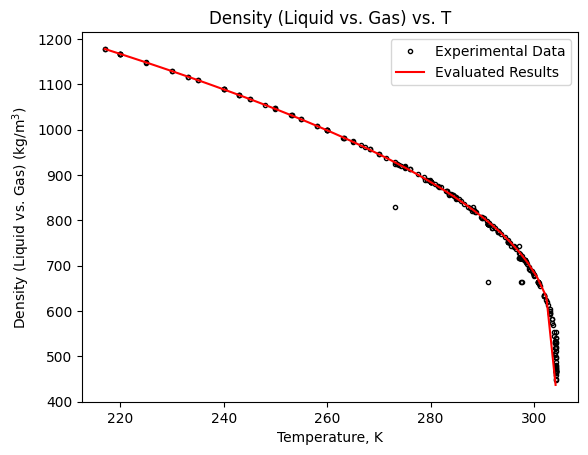

In [ ]:
data_density = """
273.15	830
267.35	960.4
271.35	937.8
274.35	919.8
279.35	887.8
284.34	854.7
288.34	821.6
290.34	804.5
296.04	742.2
276	912.878687
283.97	857.119284
293.01	776.846868
298.21	711.229449
298.43	707.092603
301.19	655.690091
303.06	595.00168
303.54	573.833351
304.15	512.000706
276	913.142741
293.01	777.19894
298.21	711.273458
298.21	711.62553
298.21	712.461701
298.43	707.312648
304.15	450.344097
304.15	528.812144
277.59	902.980066072313
278.7	895.410393548016
279.81	888.078212389709
279.9	887.07255374258
280.92	880.315392507368
281.49	875.504978515722
281.98	872.147175653362
283.03	864.65902464403
283.09	863.811463809972
284.31	854.907232395912
284.45	853.045145741064
285.42	845.778630814524
285.9	841.337307456796
286.48	836.445764069039
287.27	829.946492599617
287.59	827.122568592497
288.62	818.00476650554
288.7	817.435756652334
289.81	807.602833151996
289.95	806.401961941214
290.92	797.371964627116
291.21	794.585788597823
291.97	786.694004651271
292.47	782.155292899909
293.08	775.444441429444
293.69	769.351258348813
294.3	763.518364239672
294.92	755.742468162273
295.41	750.832443181712
296.1	741.591149369389
296.47	736.862708525081
297.3	725.487852624204
297.58	721.626173407053
298.48	707.858729354254
298.69	704.252173133793
299.64	687.09202496132
299.8	683.09696285799
300.81	663.176659749943
300.91	661.310148133233
301.97	633.384329534284
302.01	634.524024078146
303.08	594.398132891047
303.17	593.897600604572
273.8	920.690376569038
278.94	889.070707070707
283.65	856.206225680934
287.98	821.063432835821
291.94	783.078291814947
295.63	742.141652613828
299.1	693.055118110236
302.33	624.241134751773
304.15	465.211416490486
299.14	690
304.15	519.48051948052
304.15	531.632110579479
304.15	540.540540540541
304.15	539.665407447383
304.15	457.66590389016
304.15	448.430493273543
304.15	466.853408029879
304.15	480.769230769231
304.15	495.294700346706
304.15	499.251123315027
304.15	519.210799584631
303.14	603.86
304.14	553.49
258.05	1008.3
268.3	956.78
243.06	1076
248.06	1054
253.05	1031.5
258.05	1008.3
263.05	982
268.3	956.7
273.1	927.6
283.1	863.7
288.15	821.5
293.15	774.2
298.14	711.6
273.15	924.558823529412
288.15	828.79472693032
291.03	790.709703
291.05	790.709703
291.1	790.709703
291.14	790.709703
291.14	790.709703
291.17	664.183828
291.17	790.709703
291.17	790.709703
291.18	790.709703
291.18	790.709703
291.22	790.709703
291.23	790.709703
291.24	790.709703
291.27	790.709703
291.28	790.709703
291.3	790.709703
297.11	717.566745
297.12	717.566745
297.22	717.566745
297.25	717.566745
297.35	717.566745
297.35	717.566745
297.37	717.566745
297.37	717.566745
297.42	717.566745
297.42	717.566745
297.47	717.566745
297.47	717.566745
297.5	717.566745
297.5	664.183828
297.52	717.566745
297.52	717.566745
297.53	717.566745
297.54	717.566745
297.54	717.566745
297.55	717.566745
297.56	717.566745
297.56	717.566745
297.58	717.566745
297.58	717.566745
297.58	717.566745
297.58	717.566745
297.58	664.183828
297.59	717.566745
297.6	717.566745
300.67	664.183828
300.68	664.183828
300.69	664.183828
300.7	664.183828
304	533.97527988
304.09	517.89967236
304.13	502.76189663
304.15	488.4866973
304.15	474.99661853
220.01	1165.8
250.01	1046.6
275	918.7
285	851.39
299.99	678
220.01	1166.194491
225.01	1147.31463
230.01	1129.094904
235.01	1108.278647
240.01	1089.398786
245.01	1067.086223
250.01	1046.578029
255	1022.725151
260	999.44439
265	973.567098
270	946.369536
275	916.751479
280	884.184819
285	848.097439
260	998.872273
280	884.184819
291.89	783.5
266.57	964.853316
281.6	873.13856
302.65	613.48546
217	1177.03
217	1177.02
220	1166.17
220	1166.19
220	1166.16
225	1147.73
230	1128.75
235	1109.18
240	1088.9
240	1088.89
240	1088.92
245	1067.89
250	1045.97
255	1023.02
260	998.83
260	998.828
260	998.844
265	973.213
270	945.793
275	916.137
280	883.574
280	883.565
280	883.57
280	883.573
280	883.587
280	883.541
285	847.067
290	804.716
290	804.703
295	752.641
295	752.652
295	752.613
295	752.616
297	727.135
299	697.037
300	679.308
300	679.322
300	679.346
301	658.814
302	633.899
302	633.86
302.5	618.658
303	600.123
303.4	581.2
303.4	581.22
303.6	569.3
303.8	554.14
303.9	544.15
304	530.92
304.1	507.4
297	743.1
304.02	529.08
304.02	529.08
233.07	1116.54
233.07	1116.44
243.01	1076.52
243.01	1076.52
253.22	1031.59
253.22	1031.49
263.31	981.93
263.32	981.93
273.55	924.89
273.56	924.87
283.51	858.57
283.52	858.55
293.08	774.28
293.09	774.23
304.15	468.3
304.15	465.211416490486
304.15	467
304.15	476.2
304.15	467.8
304.15	478.879216539717
304.15	468
304.15	467.6
304.15	463.4
304.15	473
304.15	473
"""

array_data = np.array([list(map(float, line.split())) for line in data_density.strip().split('\n')])

# Independent variable
T = array_data[:, 0]

# Dependent variable
rho = array_data[:, 1]

Mr = 44 # g/mol of CO2

plt.plot(T, rho, 'k.', mfc = 'None', label = 'Experimental Data')

def calc_density_liq_to_gas(T, *params):
  V0, omega, Tc = params
  Tr = T/Tc
  tau = 1 - Tr
  v0 = 1 - 1.52816*tau**(1/3) + 1.43907*tau**(2/3) - 0.81446*tau + 0.190454*tau**(4/3)
  vd = (-0.296123 + 0.386914*Tr - 0.0427258*Tr**2 - 0.0480645*Tr**3)/(Tr-1.00001)
  return 1/(V0*v0*(1 - omega*vd)) # in kg/m3


"""
MOLECULE: CO2
Name	    Description	                                Value	      Units
DNLCOSTD	COSTALD parameters for liquid molar volume	-	          kg/cum
V0		                                                0.09770923	cum/kmol
omega		                                              0.439261	  Unitless
Tc		                                                304.1548	  K
Tlower		                                            217	        K
Tupper		                                            304.1548	  K
"""

# V0 should be in m3/kg
CO2_params = np.array([0.09770923/Mr, 0.439261, 304.1548])

T_test = np.linspace(217, 304.1548)
plt.plot(T_test, calc_density_liq_to_gas(T_test, *CO2_params), "r-", label = 'Evaluated Results')
plt.xlabel('Temperature, K')
plt.ylabel('Density (Liquid vs. Gas) (kg/m$^3$)')
plt.title('Density (Liquid vs. Gas) vs. T')
plt.legend()

Viscosity (Liquid vs. Gas)

\begin{equation}
lnη_i^{*,l} = C_{1i} + C_{2i}/T + C_{3i}/T^2 + C_{4i}/T^3
\end{equation}

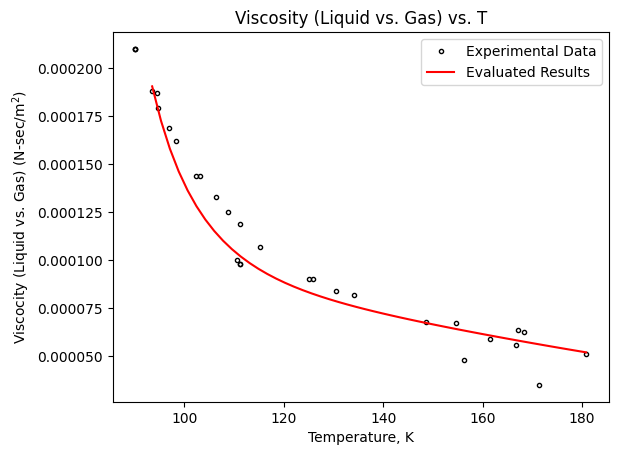

In [ ]:
data_visc_liq_to_gas = """
90.1		0.00021
93.52		0.000188
94.62		0.000179
110.61	0.0001
111.21	9.8E-05
111.21	9.8E-05
125.9		9E-05
134.2		8.2E-05
154.62	6.7E-05
167.13	6.35E-05
168.43	6.25E-05
90.1		0.00021
90.1		0.00021
94.42		0.000187
98.318	0.000162
102.42	0.000144
108.81	0.000125
111.21	0.000119
130.6		8.4E-05
148.61	6.8E-05
161.42	5.9E-05
166.83	5.6E-05
180.84	5.1E-05
103.17	0.000144
96.809	0.000169
106.41	0.000133
115.31	0.000107
125.01	9E-05
156.31	4.8E-05
171.41	3.5E-05
"""

array_data = np.array([list(map(float, line.split())) for line in data_visc_liq_to_gas.strip().split('\n')])

# Independent variable
T = array_data[:, 0]

# Dependent variable
visc = array_data[:, 1]

plt.plot(T, visc, 'k.', mfc = 'None', label = 'Experimental Data')

"""
MOLECULE: CH4
Name	  Description				                  Value		    Units
MULNVE	TDE equation for liquid viscosity	  -		        N-sec/sqm
c1						                              -14.94345	  Unitless
c2						                               1891.392	  K
c3						                              -234700		  K**2
c4						                               10623530	  K**3
Tlower						                           93.5199		K
Tupper						                           180.8396	  K
"""

coeffs = np.array([-14.94345, 1891.382, -234700, 10623530])

def calc_visc(T, *params):
    terms = [T**m for m in range(len(params))]
    visc = sum(param / term for param, term in zip(params, terms))
    return np.exp(visc)

T_test = np.linspace(93.5199, 180.8396)

plt.plot(T_test, calc_visc(T_test, *coeffs), 'r', label = 'Evaluated Results')
plt.xlabel('Temperature, K')
plt.ylabel('Viscocity (Liquid vs. Gas) (N-sec/m$^2$)')
plt.title('Viscosity (Liquid vs. Gas) vs. T')
plt.legend()

Viscosity (Gas)

$$
η_i^{*,v} = \sum_{m=1}^{nTerms}C_{mi}T^{m-1}
$$

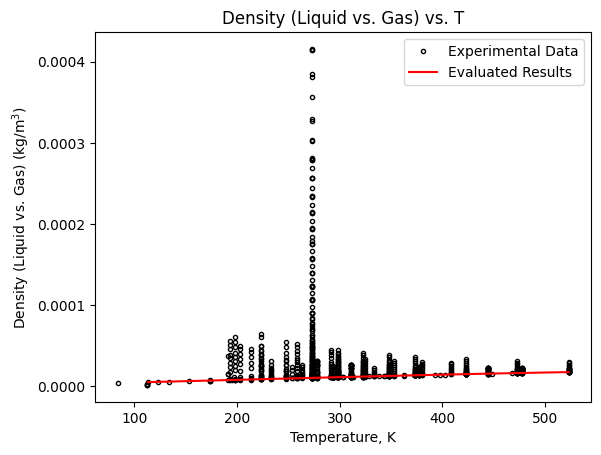

In [ ]:
data_visc_gas = """
83.6	3.51E-06
194.75	7.63E-06
273.1	1.033E-05
290.14	1.094E-05
373.12	1.363E-05
296.14	1.079E-05
293.14	1.125E-05
303.13	1.171E-05
313.13	1.191E-05
323.13	1.22E-05
333.12	1.255E-05
343.12	1.289E-05
353.12	1.316E-05
363.12	1.345E-05
373.07	1.38E-05
258.16	9.76E-06
258.16	9.91E-06
258.16	1.013E-05
258.16	1.07E-05
258.16	1.15E-05
258.16	1.25E-05
258.16	1.387E-05
258.16	1.845E-05
258.16	2.255E-05
258.16	2.617E-05
258.16	2.937E-05
258.16	3.227E-05
258.16	3.492E-05
258.16	3.955E-05
258.16	4.38E-05
258.16	4.782E-05
258.16	5.155E-05
273.15	1.027E-05
273.15	1.04E-05
273.15	1.062E-05
273.15	1.115E-05
273.15	1.18E-05
273.15	1.267E-05
273.15	1.375E-05
273.15	1.742E-05
273.15	2.1E-05
273.15	2.422E-05
273.15	2.715E-05
273.15	2.93E-05
273.15	3.232E-05
273.15	3.69E-05
273.15	4.095E-05
273.15	4.47E-05
273.15	4.817E-05
291.14	1.08E-05
291.14	1.09E-05
291.14	1.114E-05
291.14	1.153E-05
291.14	1.212E-05
291.14	1.285E-05
291.14	1.37E-05
291.14	1.67E-05
291.14	1.965E-05
291.14	2.235E-05
291.14	2.515E-05
291.14	2.778E-05
291.14	3.017E-05
291.14	3.445E-05
291.14	3.792E-05
291.14	4.17E-05
291.14	4.507E-05
298.14	1.108E-05
298.14	1.12E-05
298.14	1.137E-05
298.14	1.18E-05
298.14	1.237E-05
298.14	1.31E-05
298.14	1.395E-05
298.14	1.652E-05
298.14	1.93E-05
298.14	2.187E-05
298.14	2.455E-05
298.14	2.705E-05
298.14	2.942E-05
298.14	3.365E-05
298.14	3.74E-05
298.14	4.087E-05
298.14	4.41E-05
323.13	1.182E-05
323.13	1.193E-05
323.13	1.21E-05
323.13	1.247E-05
323.13	1.295E-05
323.13	1.352E-05
323.13	1.417E-05
323.13	1.61E-05
323.13	1.83E-05
323.13	2.062E-05
323.13	2.3E-05
323.13	2.53E-05
323.13	2.745E-05
323.13	3.145E-05
323.13	3.485E-05
323.13	3.802E-05
323.13	4.095E-05
348.12	1.26E-05
348.12	1.27E-05
348.12	1.28E-05
348.12	1.312E-05
348.12	1.35E-05
348.12	1.392E-05
348.12	1.445E-05
348.12	1.6E-05
348.12	1.787E-05
348.12	2.002E-05
348.12	2.205E-05
348.12	2.401E-05
348.12	2.593E-05
348.12	2.955E-05
348.12	3.277E-05
348.12	3.545E-05
348.12	3.855E-05
373.12	1.331E-05
373.12	1.34E-05
373.12	1.35E-05
373.12	1.377E-05
373.12	1.415E-05
373.12	1.452E-05
373.12	1.497E-05
373.12	1.627E-05
373.12	1.787E-05
373.12	1.965E-05
373.12	2.142E-05
373.12	2.32E-05
373.12	2.486E-05
373.12	2.815E-05
373.12	3.12E-05
373.12	3.395E-05
373.12	3.655E-05
423.13	1.471E-05
423.13	1.477E-05
423.13	1.483E-05
423.13	1.512E-05
423.13	1.53E-05
423.13	1.556E-05
423.13	1.58E-05
423.13	1.685E-05
423.13	1.807E-05
423.13	1.942E-05
423.13	2.085E-05
423.13	2.23E-05
423.13	2.37E-05
423.13	2.635E-05
423.13	2.887E-05
423.13	3.13E-05
423.13	3.367E-05
473.15	1.603E-05
473.15	1.611E-05
473.15	1.617E-05
473.15	1.634E-05
473.15	1.663E-05
473.15	1.675E-05
473.15	1.7E-05
473.15	1.775E-05
473.15	1.867E-05
473.15	1.975E-05
473.15	2.075E-05
473.15	2.182E-05
473.15	2.29E-05
473.15	2.5E-05
473.15	2.705E-05
473.15	2.91E-05
473.15	3.107E-05
523.17	1.725E-05
523.17	1.728E-05
523.17	1.733E-05
523.17	1.745E-05
523.17	1.765E-05
523.17	1.785E-05
523.17	1.809E-05
523.17	1.872E-05
523.17	1.947E-05
523.17	2.03E-05
523.17	2.12E-05
523.17	2.205E-05
523.17	2.295E-05
523.17	2.47E-05
523.17	2.645E-05
523.17	2.82E-05
523.17	2.995E-05
222.99	1.219E-05
222.99	2.564E-05
222.99	3.437E-05
222.99	4.034E-05
222.99	5.017E-05
222.99	6.009E-05
222.99	6.428E-05
248.17	1.238E-05
248.17	1.909E-05
248.17	2.614E-05
248.17	3.189E-05
248.17	4.088E-05
248.17	4.874E-05
248.17	5.489E-05
273.15	1.298E-05
273.15	1.728E-05
273.15	2.204E-05
273.15	2.657E-05
273.15	3.467E-05
273.15	4.139E-05
273.15	4.655E-05
298.14	1.335E-05
298.14	1.601E-05
298.14	1.97E-05
298.14	2.34E-05
298.14	3.038E-05
298.14	3.597E-05
298.14	4.007E-05
191.09	7.84E-06
191.09	1.569E-05
191.09	3.746E-05
223.19	9.02E-06
223.19	1.314E-05
223.19	2.157E-05
233.18	9.41E-06
233.18	1.088E-05
233.18	1.942E-05
253.17	1.059E-05
253.17	1.069E-05
253.17	1.52E-05
253.17	2.04E-05
253.17	2.354E-05
273.15	1.098E-05
273.15	1.206E-05
273.15	1.363E-05
273.15	1.775E-05
273.15	2.157E-05
298.14	1.162E-05
298.14	1.245E-05
298.14	1.383E-05
298.14	1.667E-05
298.14	1.981E-05
323.13	1.201E-05
323.13	1.314E-05
323.13	1.466E-05
323.13	1.795E-05
323.13	2.069E-05
111.76	1.62E-06
111.76	1.841E-06
111.76	2.01E-06
111.76	2.19E-06
324.79	1.189E-05
324.79	1.233E-05
324.79	1.329E-05
324.79	1.593E-05
324.79	1.909E-05
324.79	2.21E-05
324.79	2.511E-05
324.79	2.81E-05
324.79	3.081E-05
324.79	3.329E-05
352.57	1.297E-05
352.57	1.34E-05
352.57	1.411E-05
352.57	1.617E-05
352.57	1.874E-05
352.57	2.143E-05
352.57	2.41E-05
352.57	2.67E-05
352.57	2.924E-05
352.57	3.158E-05
380.35	1.382E-05
380.35	1.427E-05
380.35	1.49E-05
380.35	1.658E-05
380.35	1.872E-05
380.35	2.114E-05
380.35	2.349E-05
380.35	2.57E-05
380.35	2.787E-05
380.35	3E-05
408.13	1.465E-05
408.13	1.511E-05
408.13	1.57E-05
408.13	1.713E-05
408.13	1.889E-05
408.13	2.085E-05
408.13	2.287E-05
408.13	2.488E-05
408.13	2.682E-05
408.13	2.87E-05
298.14	1.122E-05
298.14	1.148E-05
298.14	1.196E-05
298.14	1.227E-05
298.14	1.282E-05
298.14	1.385E-05
298.14	1.45E-05
298.14	1.608E-05
298.14	1.778E-05
298.14	1.938E-05
298.14	2.007E-05
298.14	2.276E-05
298.14	2.531E-05
298.14	2.782E-05
298.14	2.994E-05
298.14	3.213E-05
298.14	3.409E-05
323.13	1.19E-05
323.13	1.21E-05
323.13	1.251E-05
323.13	1.282E-05
323.13	1.332E-05
323.13	1.347E-05
323.13	1.429E-05
323.13	1.46E-05
323.13	1.669E-05
323.13	1.873E-05
323.13	2.117E-05
323.13	2.326E-05
323.13	2.551E-05
323.13	2.749E-05
323.13	2.939E-05
323.13	3.132E-05
323.13	1.202E-05
348.12	1.27E-05
348.12	1.3E-05
348.12	1.338E-05
348.12	1.368E-05
348.12	1.474E-05
348.12	1.481E-05
348.12	1.662E-05
348.12	1.832E-05
348.12	2.034E-05
348.12	2.197E-05
348.12	2.406E-05
348.12	2.578E-05
348.12	2.736E-05
348.12	1.285E-05
193.2	1.78E-05
197.2	1.16E-05
190.99	1.5E-05
223.09	8.82E-06
223.09	1.0875E-05
223.09	1.3528E-05
223.09	2.1641E-05
223.09	2.5013E-05
223.09	2.731E-05
248.07	9.555E-06
248.07	9.98E-06
248.07	1.1117E-05
248.07	1.239E-05
248.07	1.4144E-05
248.07	1.8692E-05
248.07	2.0865E-05
273.15	1.041E-05
273.15	1.0644E-05
273.15	1.1264E-05
273.15	1.201E-05
273.15	1.3454E-05
273.15	1.5799E-05
273.15	1.8487E-05
298.14	1.1479E-05
298.14	1.2123E-05
298.14	1.2923E-05
298.14	1.4384E-05
298.14	1.6731E-05
298.14	1.7709E-05
348.12	1.3037E-05
348.12	1.3504E-05
348.12	1.4119E-05
348.12	1.5222E-05
348.12	1.6066E-05
348.12	1.71E-05
423.13	1.5063E-05
423.13	1.5233E-05
423.13	1.562E-05
423.13	1.6055E-05
423.13	1.6831E-05
423.13	1.7496E-05
423.13	1.7827E-05
277.59	1.062E-05
277.59	1.082E-05
277.59	1.113E-05
277.59	1.15E-05
277.59	1.19E-05
277.59	1.241E-05
277.59	1.416E-05
277.59	1.666E-05
277.59	1.914E-05
277.59	2.158E-05
277.59	2.406E-05
277.59	2.633E-05
277.59	2.833E-05
277.59	3.03E-05
310.88	1.161E-05
310.88	1.18E-05
310.88	1.202E-05
310.88	1.228E-05
310.88	1.262E-05
310.88	1.3E-05
310.88	1.43E-05
310.88	1.574E-05
310.88	1.734E-05
310.88	1.914E-05
310.88	2.101E-05
310.88	2.288E-05
310.88	2.455E-05
310.88	2.628E-05
377.57	1.359E-05
377.57	1.372E-05
377.57	1.391E-05
377.57	1.411E-05
377.57	1.434E-05
377.57	1.46E-05
377.57	1.538E-05
377.57	1.63E-05
377.57	1.73E-05
377.57	1.837E-05
377.57	1.95E-05
377.57	2.07E-05
377.57	2.185E-05
377.57	2.304E-05
444.25	1.556E-05
444.25	1.566E-05
444.25	1.581E-05
444.25	1.595E-05
444.25	1.611E-05
444.25	1.63E-05
444.25	1.686E-05
444.25	1.752E-05
444.25	1.826E-05
444.25	1.904E-05
444.25	1.984E-05
444.25	2.068E-05
444.25	2.15E-05
444.25	2.233E-05
477.6	1.654E-05
477.6	1.664E-05
477.6	1.677E-05
477.6	1.69E-05
477.6	1.704E-05
477.6	1.72E-05
477.6	1.768E-05
477.6	1.826E-05
477.6	1.888E-05
477.6	1.954E-05
477.6	2.021E-05
477.6	2.09E-05
477.6	2.155E-05
477.6	2.225E-05
277.59	1.0479E-05
277.59	1.2438E-05
277.59	1.699E-05
277.59	1.7008E-05
277.59	1.6881E-05
277.59	2.6417E-05
277.59	2.6429E-05
277.59	2.6436E-05
277.59	3.0814E-05
277.59	3.077E-05
277.59	3.0833E-05
277.59	1.0552E-05
277.59	1.2459E-05
277.59	2.6446E-05
277.59	1.0558E-05
277.59	1.2445E-05
310.88	1.1685E-05
310.88	1.1602E-05
310.88	1.1603E-05
310.88	1.1684E-05
310.88	1.1569E-05
310.88	1.2823E-05
310.88	1.4328E-05
310.88	1.4287E-05
310.88	1.5536E-05
310.88	2.2952E-05
310.88	2.2924E-05
310.88	2.2741E-05
310.88	2.2697E-05
310.88	2.6489E-05
310.88	2.6454E-05
310.88	2.6414E-05
310.88	2.6436E-05
310.88	2.6362E-05
310.88	1.1614E-05
310.88	1.1616E-05
310.88	1.2835E-05
310.88	1.4349E-05
310.88	1.5536E-05
310.88	2.6434E-05
310.88	1.1629E-05
310.88	1.1644E-05
310.88	1.5634E-05
310.88	2.6522E-05
310.88	1.5642E-05
377.57	1.362E-05
377.57	1.4639E-05
377.57	1.4658E-05
377.57	1.6389E-05
377.57	1.6368E-05
377.57	1.6363E-05
377.57	2.085E-05
377.57	2.094E-05
377.57	2.0712E-05
377.57	2.0743E-05
377.57	2.0849E-05
377.57	2.0776E-05
377.57	2.3278E-05
377.57	1.3621E-05
377.57	1.4656E-05
377.57	2.0641E-05
377.57	2.3406E-05
377.57	1.3653E-05
377.57	2.0622E-05
377.57	2.3382E-05
377.57	2.3335E-05
444.25	1.5579E-05
444.25	1.6377E-05
444.25	1.6357E-05
444.25	1.6358E-05
444.25	1.7589E-05
444.25	1.7552E-05
444.25	2.0976E-05
444.25	2.0918E-05
444.25	2.0915E-05
444.25	2.2208E-05
444.25	2.2165E-05
444.25	2.2513E-05
444.25	2.2499E-05
444.25	2.2581E-05
444.25	1.5602E-05
444.25	1.7594E-05
444.25	2.2179E-05
444.25	1.5604E-05
444.25	1.5605E-05
477.6	1.6526E-05
477.6	1.7242E-05
477.6	1.7253E-05
477.6	1.7214E-05
477.6	1.8338E-05
477.6	1.8354E-05
477.6	2.0909E-05
477.6	2.0921E-05
477.6	2.1058E-05
477.6	2.2285E-05
477.6	2.232E-05
477.6	1.6551E-05
477.6	1.8389E-05
477.6	2.1104E-05
477.6	2.2271E-05
477.6	1.6553E-05
477.6	2.0991E-05
477.6	2.0939E-05
113.16	5.2E-06
123.15	5.5E-06
133.15	5.8E-06
153.17	6.4E-06
173.19	7.1E-06
193.09	7.6E-06
193.09	9.4E-06
193.09	2.35E-05
193.09	2.88E-05
193.09	3.45E-05
193.09	3.91E-05
193.09	4.53E-05
193.09	5.08E-05
193.09	5.55E-05
203.09	8E-06
203.09	9E-06
203.09	1.13E-05
203.09	1.85E-05
203.09	2.8E-05
203.09	3.33E-05
203.09	4.03E-05
203.09	4.56E-05
203.09	5.01E-05
213.1	8.3E-06
213.1	9.2E-06
213.1	1.03E-05
213.1	1.27E-05
213.1	2.29E-05
213.1	2.87E-05
213.1	3.64E-05
213.1	4.2E-05
213.1	4.63E-05
223.09	8.5E-06
223.09	9.6E-06
223.09	1.04E-05
223.09	1.18E-05
223.09	1.84E-05
223.09	2.44E-05
223.09	3.3E-05
223.09	3.86E-05
223.09	4.32E-05
248.07	9.3E-06
248.07	1.03E-05
248.07	1.08E-05
248.07	1.16E-05
248.07	1.44E-05
248.07	1.82E-05
248.07	2.56E-05
248.07	3.14E-05
248.07	3.61E-05
273.15	1.01E-05
273.15	1.11E-05
273.15	1.15E-05
273.15	1.2E-05
273.15	1.38E-05
273.15	1.61E-05
273.15	2.14E-05
273.15	2.63E-05
273.15	3.05E-05
298.14	1.1092E-05
323.14	1.1941E-05
373.07	1.3514E-05
423.11	1.4896E-05
468.11	1.6116E-05
303.14	1.115E-05
313.14	1.163E-05
323.14	1.19E-05
338.33	1.225E-05
344.23	1.26E-05
363.13	1.308E-05
373.12	1.336E-05
393.12	1.404E-05
403.12	1.422E-05
173.16	6.672E-06
173.16	6.766E-06
173.16	7.059E-06
198.16	7.639E-06
198.16	7.754E-06
198.16	8.022E-06
198.16	9.219E-06
198.16	1.9506E-05
198.16	2.4362E-05
198.16	3.0679E-05
198.16	3.5742E-05
198.16	4.1115E-05
198.16	4.8505E-05
198.16	5.4773E-05
198.16	6.0755E-05
223.16	8.502E-06
223.16	8.585E-06
223.16	9.514E-06
223.16	1.3765E-05
223.16	1.8175E-05
223.16	2.4848E-05
223.16	3.1203E-05
223.16	3.8568E-05
223.16	4.4583E-05
223.16	4.9875E-05
273.15	1.0207E-05
273.15	1.0295E-05
273.15	1.0454E-05
273.15	1.0963E-05
273.15	1.1597E-05
273.15	1.3308E-05
273.15	1.6381E-05
273.15	2.104E-05
273.15	2.7663E-05
273.15	3.3086E-05
273.15	3.768E-05
296.14	1.1035E-05
372.12	1.3444E-05
477.11	1.6406E-05
298.14	1.113E-05
323.14	1.193E-05
348.13	1.271E-05
373.12	1.346E-05
398.12	1.42E-05
423.11	1.491E-05
448.11	1.56E-05
473.11	1.628E-05
298.14	1.109E-05
328.14	1.208E-05
373.07	1.35E-05
423.11	1.488E-05
473.11	1.623E-05
273.1	1.053E-05
273.1	1.058E-05
273.1	1.059E-05
273.1	1.082E-05
273.1	1.079E-05
273.1	1.1E-05
273.1	1.116E-05
273.1	1.124E-05
273.1	1.151E-05
273.1	1.178E-05
273.1	1.175E-05
273.1	1.196E-05
273.1	1.217E-05
273.1	1.227E-05
273.1	1.243E-05
273.1	1.268E-05
273.1	1.274E-05
273.1	1.309E-05
273.1	1.326E-05
273.1	1.352E-05
273.1	1.392E-05
273.1	1.433E-05
273.1	1.471E-05
273.1	1.545E-05
273.1	1.607E-05
273.1	1.704E-05
273.1	1.765E-05
273.1	1.897E-05
273.1	2.015E-05
273.1	2.12E-05
273.1	2.234E-05
273.1	2.323E-05
273.1	2.453E-05
273.1	2.551E-05
273.1	2.669E-05
273.1	2.795E-05
273.1	2.928E-05
273.1	3.108E-05
273.1	3.276E-05
273.1	3.367E-05
273.1	3.555E-05
273.1	3.657E-05
273.1	3.83E-05
273.1	3.997E-05
273.1	4.209E-05
273.1	4.416E-05
273.1	4.621E-05
273.1	4.806E-05
273.1	4.986E-05
273.1	5.182E-05
273.1	5.335E-05
273.1	5.373E-05
273.1	5.6E-05
273.1	5.708E-05
273.1	5.675E-05
273.1	6.072E-05
273.1	6.298E-05
273.1	6.339E-05
273.1	6.758E-05
273.1	7.032E-05
273.1	7.082E-05
273.1	7.443E-05
273.1	7.646E-05
273.1	7.779E-05
273.1	8.298E-05
273.1	8.397E-05
273.1	9.055E-05
273.1	9.059E-05
273.1	9.016E-05
273.1	9.033E-05
273.1	9.734E-05
273.1	0.0001065
273.1	0.0001065
273.1	0.0001061
273.1	0.0001072
273.1	0.0001146
273.1	0.0001231
273.1	0.0001222
273.1	0.0001235
273.1	0.0001234
273.1	0.0001306
273.1	0.0001392
273.1	0.0001398
273.1	0.0001482
273.1	0.0001573
273.1	0.0001574
273.1	0.0001578
273.1	0.0001661
273.1	0.0001756
273.1	0.0001751
273.1	0.0001752
273.1	0.0001785
273.1	0.0001845
273.1	0.000194
273.1	0.0001949
273.1	0.0001939
273.1	0.0002035
273.1	0.0002136
273.1	0.0002147
273.1	0.0002235
273.1	0.0002331
273.1	0.0002347
273.1	0.0002341
273.1	0.0002438
273.1	0.0002568
273.1	0.0002561
273.1	0.0002571
273.1	0.0002693
273.1	0.0002789
273.1	0.0002789
273.1	0.0002806
273.1	0.0003029
273.1	0.0003275
273.1	0.0003291
273.1	0.0003571
273.1	0.0003811
273.1	0.0003854
273.1	0.000414
273.1	0.0004143
273.1	4.975E-05
273.1	0.0001397
273.1	0.0002133
273.1	0.0002813
273.1	0.0003038
273.1	0.0004158
233.15	8.941E-06
233.15	9.743E-06
233.15	1.088E-05
233.15	1.2361E-05
233.15	1.4197E-05
233.15	1.6581E-05
233.15	1.9332E-05
233.15	2.2679E-05
233.15	2.6631E-05
233.15	3.1278E-05
263.15	9.969E-06
263.15	1.0798E-05
263.15	1.194E-05
263.15	1.3422E-05
263.15	1.525E-05
263.15	1.7546E-05
263.15	2.0308E-05
263.15	2.3547E-05
263.15	2.6568E-05
293.15	1.0979E-05
293.15	1.0977E-05
293.15	1.1807E-05
293.15	1.2966E-05
293.15	1.4428E-05
293.15	1.4442E-05
293.15	1.6293E-05
293.15	1.8535E-05
293.15	2.1211E-05
293.15	2.4304E-05
293.15	2.4382E-05
333.15	1.2261E-05
333.15	1.3106E-05
333.15	1.4279E-05
333.15	1.5768E-05
333.15	1.7608E-05
333.15	1.9829E-05
333.15	2.2428E-05
373.15	1.3479E-05
373.15	1.3482E-05
373.15	1.4346E-05
373.15	1.5531E-05
373.15	1.7028E-05
373.15	1.7047E-05
373.15	1.8854E-05
373.15	2.1067E-05
373.15	2.1079E-05
423.15	1.4901E-05
423.15	1.5812E-05
423.15	1.7023E-05
423.15	1.8534E-05
423.15	2.0384E-05
473.15	1.628E-05
473.15	1.7165E-05
473.15	1.8379E-05
473.15	1.9872E-05
523.15	1.7577E-05
523.15	1.759E-05
523.15	1.8482E-05
523.15	1.9656E-05
523.15	2.1154E-05
523.15	2.1177E-05
293.15	1.092E-05
293.15	1.093E-05
293.15	1.095E-05
293.15	1.097E-05
293.15	1.098E-05
293.15	1.099E-05
293.15	1.101E-05
293.15	1.102E-05
293.15	1.104E-05
293.15	1.106E-05
293.15	1.108E-05
293.15	1.11E-05
293.15	1.112E-05
293.15	1.114E-05
293.15	1.116E-05
293.15	1.118E-05
293.15	1.121E-05
293.15	1.124E-05
293.15	1.126E-05
293.15	1.129E-05
293.15	1.131E-05
293.15	1.134E-05
293.15	1.137E-05
293.15	1.141E-05
293.15	1.144E-05
293.15	1.112E-05
"""

array_data = np.array([list(map(float, line.split())) for line in data_visc_gas.strip().split('\n')])

# Independent variable
T = array_data[:, 0]

# Dependent variable
vapor_press = array_data[:, 1]

plt.plot(T, vapor_press, 'k.', mfc = 'None', label = 'Experimental Data')

# V0 should be in m3/kg
params = np.array([1.770374e-6, 2.645321e-08, 2.944073e-11, -4.372485e-14])

def calc_visc_gas(T, *params):
  T_params = np.array([T**m for m in range(len(params))])
  return np.dot(params, T_params)

"""
MOLECULE: CH4
Name	    Description	                              Value	        Units
MUVTMLPO	ThermoML polynomials for vapor viscosity	-	            N-sec/sqm
c1		                                              1.770374E-06	N-sec/sqm
c2		                                              2.645321E-08	N-sec/sqm-K
c3		                                              2.944073E-11	N-sec/sqm-K**2
c4		                                             -4.372485E-14	N-sec/sqm-K**3
nTerms		                                          4	            Unitless
Tlower		                                          113.157	      K
Tupper	                                            523.171	      K
"""

T_test = np.linspace(113.157, 523.171)
plt.plot(T_test, calc_visc_gas(T_test, *params), "r-", label = 'Evaluated Results')
plt.xlabel('Temperature, K')
plt.ylabel('Density (Liquid vs. Gas) (kg/m$^3$)')
plt.title('Density (Liquid vs. Gas) vs. T')
plt.legend()



Wagner Equation (Liquid Vapor Pressure Equation)

$$
ln_{p_i}^{*,l} = lnp_{ci}+ \frac{C_{1i}(1-T_{ri}) + C_{2i}(1-T_{ri})^{1.5} + C_{3i}(1-T_{ri})^{2.5} + C_{4i}(1-T_{ri})^{5}}{T_{ri} } \\
where \\
T_{ri} = T/T_{ci}
$$

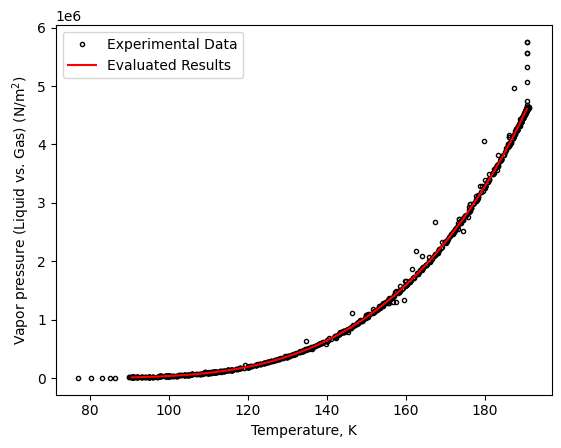

In [ ]:
data_vapor_press_liq_vs_gas = """
142.25	678876
159.71	1661730
174.57	2522990
190.53	5319550
190.56	5755240
190.56	5562700
187.26	4964900
179.69	4053000
167.34	2664800
162.55	2168400
146.36	1114600
134.65	628200
119.35	226970
109.16	101300
109.16	101325
110.21	101325
92.15	14286.8
90.01	9332.54
113.16	101325
176.22	2978960
178.24	3141070
182.27	3586910
185.31	3939520
187.85	4258690
188.97	4443100
109.16	99858.2
80.26	2133.15
86.48	6226.14
91.28	12558.9
99.678	33250.5
102.68	44876.2
108.39	76113.5
110.71	92805.4
92.15	14012.1
93.17	15852
94.17	17918.5
95.169	20145
96.169	22611.4
97.169	25331.2
98.169	28277.6
99.168	31477.3
100.17	34930.4
101.17	38663.4
102.17	42716.4
103.17	47089.3
104.17	51835.6
105.17	56955.2
106.16	62421.4
107.16	68287.5
108.16	74567
109.16	81273.1
110.16	88499.1
133.63	457381
138.56	595183
143.5	769057
148.45	970592
153.4	1210730
158.35	1483300
163.3	1813410
172.42	2547920
178.12	3088990
181.08	3414650
185.89	4003450
143.39	767436
158.56	1482790
168.27	2202500
168.35	2199460
172.34	2533530
178.12	3098520
181.08	3413030
185.83	4015100
187.67	4236090
189.5	4479270
190.53	4667330
97.312	26081.1
100.92	38300.8
106.02	62902.6
110.03	89571.3
114.64	129990
91.65	13332.2
97.469	26597.7
104.22	53075.5
111.51	101325
124.8	265977
136.3	530755
145.41	841262
155.72	1333220
167.28	2113150
173.64	2659770
85.18	5159.6
90.95	11272.4
90.12	11559
83.15	3999.7
136.14	490332
139.87	588399
140.68	686466
145.42	784532
146.5	892405
148.41	990472
150.01	1078730
151.77	1186600
154.09	1284670
155.84	1372930
157.29	1471000
160.06	1657320
161.63	1863260
165.87	2079010
169.04	2333980
173.42	2716440
176.26	2981220
179.14	3285230
180.04	3393100
180.96	3500970
111.51	101325
99.518	32810.635
99.068	31184.1
99.148	31450.7
99.208	31650.7
99.268	31850.7
99.338	32090.7
99.398	32304
99.468	32517.3
99.548	32917.3
99.608	33024
99.698	33317.3
99.748	33583.9
99.858	33890.5
99.938	34183.9
100.02	34463.8
100.11	34797.1
100.19	35103.8
127.1	311070
143.11	754870
158.12	1479300
175.14	2786400
186.14	4012500
191.19	4640670
111.56	101325
77.15	1866.51
111.76	101325
111.66	101325
102.57	44262.9
105.56	61061.5
108.76	80259.8
111.36	99458.2
111.66	101858
182.55	3577690
185.97	3973449
105.39	57867.7
111.36	98519.19
115.91	142169.9
122.04	220770.1
124.4	261311
135.9	519865
147.62	934929
148.52	974919
154.33	1262430
156.36	1376194
159.28	1549941
164.13	1876063
171.18	2431781
177.18	2993704
179.05	3183999
182.82	3608026
185.99	3995512
188.44	4314050
190.39	4580187
190.56	4607766
157.61	1482370
120.2	196000
134.6	490000
143.41	785000
149.91	1079000
158.42	1569000
91.17	12452.3
92.05	13908.2
92.89	15453.4
93.24	16094.6
94.889	19521
94.929	19638.3
95.909	21990.1
97.699	26832.4
97.719	26905.7
99.288	31817.3
100.53	35881
101.94	41832.4
104.12	51787.6
104.6	54239.4
105.87	61152.1
107.6	71413.9
108.94	80329.2
110.45	91478.9
91.1	12362
111.51	101330
137	551210
150.31	1088230
115.5	136991
118.11	166680
120.36	195861
123.99	250881
126.91	303164
129.7	360210
131.47	400335
136.93	543913
137.51	560631
139.94	637537
140	639259
142.34	719813
142.77	736126
145.33	833900
147.61	929353
149.19	998862
150.31	1044255
152.15	1139910
152.69	1170506
153.36	1203133
154.1	1241333
154.94	1276700
155.78	1287131
155.83	1338500
155.83	1338706
156.63	1297163
157.61	1308714
157.91	1460296
158.56	1500015
159.54	1332728
160.38	1614411
162.96	1785549
165.46	1956180
167.38	2111512
168.84	2229859
170.44	2361176
171.66	2468885
172.7	2560480
174.96	2767996
176.17	2886750
177.77	3046640
179.79	3258308
181.93	3496624
184.08	3749836
185.8	3960288
186.5	4047528
187.35	4166180
187.69	4203062
188.83	4356063
189.5	4449586
189.99	4516663
190.21	4547470
190.51	4590124
190.59	4601878
111.76	101303
123.15	245166
133.15	451106
143.16	756093
153.17	1191510
163.18	1784810
173.19	2556590
183.09	3555890
191.09	4630700
90.66	11677.71
92	13788.2
94.02	17521.23
96.019	22058.19
98.019	27521.74
100.02	34045.2
102.02	41783.2
104.02	50863.82
106.01	61470.94
108.01	73769.93
110.01	87932.77
112.01	104143.43
114.01	122579.25
116.01	143441.5
118	166906.3
120	193170.8
122	222421.7
124	254845.7
126	290629.4
128	329959.5
130	373022.7
132	419992.1
134	471041.3
136	526316.7
138	586018.5
140.01	650333.2
142.01	719394.2
144.01	811879.9
146.01	872501.6
148.01	956908
150.01	1046847
152.02	1142439
154.02	1243951
156.02	1351755
158.02	1466413
160.02	1586670
162.02	1714526
164.03	1849715
166.03	1992769
168.03	2144224
170.03	2304210
172.03	2473663
174.04	2652982
176.04	2843100
178.04	3044550
180.04	3258532
182.04	3485847
184.04	3727693
186.04	3985406
188.04	4260583
190.04	4554425
91.7	13332.2
95.079	19998
97.619	26664
99.698	33331
101.48	39997
104.41	53329
106.81	66661
108.87	79993
110.68	93326
111.67	101325
112.3	106658
113.77	119990
115.12	133322
117.55	159987
120.55	199984
91.17	12452.3
92.05	13908.19
92.89	15453.4
93.24	16094.68
94.889	19521.06
94.929	19638.4
95.909	21990.19
97.699	26832.46
97.719	26905.79
111.43	101325
109.39	85822.3
114.35	127406.1
117.26	158026.5
119.98	191919.7
126.5	296041.3
135.57	505115.3
141.94	705637.4
146.55	883017
151.63	1115183
155.14	1299290
161.07	1658589
167.54	2127318
172.42	2537482
176.48	2918261
180.06	3289111
183.8	3712751
187.28	4146422
189.56	4453538
111.21	97470
183.19	3633510
111.66	101325
111.67	101325
123.38	242322.3
128.8	342546.3
129.42	371574
131.95	410800.6
132.85	447379.4
134.35	477878.1
139.08	608894.9
145.97	861808.4
148.76	968014.4
155.52	1333508.3
156.98	1417943.5
158.37	1496690.9
159.94	1594757.4
162.83	1794518.9
163.55	1841983.1
164.41	1900234.6
172.33	2540412.7
176.15	2865895.4
179.49	3209716.5
183.27	3622870.7
186.04	3995817.6
188.74	4312376.3
111.71	101325
112.36	111109
117.82	164850
120.49	199173
122.71	233791
124.9	269977
126.96	308321
128.33	336270
130.25	378341
131.41	405309
132.13	423059
135.6	512790
137.91	581240
140.24	655575
142.22	724613
144.21	800026
146.71	900545
147.85	950068
149.81	1037250
152.43	1163170
155.48	1328600
156.67	1395490
158.52	1506110
161.18	1675560
164.33	1893170
167.43	2126380
170.55	2381050
173.3	2624260
175.78	2759690
178.13	3092330
179.87	3276210
181.86	3495380
183.36	3668470
186.28	4026120
186.51	4030830
187.51	4181850
187.58	4190380
189.06	4392200
190.29	4557050
177.63	3123330
90	10784
95.019	19845
100.02	34508
105.02	56509
110.01	88243
133.73	455259
136.41	528688
138.73	598187
144.43	799099
148.83	984292
154.33	1255880
158.23	1479400
161.89	1712650
165.9	1998920
166.05	2002570
170.44	2352830
174.37	2707630
176.48	2915640
177.99	3067950
180.73	3349940
182.22	3517900
184.74	3821200
186.57	4047900
188.16	4257220
188.64	4321620
188.84	4355750
188.96	4363330
189.11	4387190
189.43	4431310
189.46	4430760
189.66	4462200
189.72	4470960
190.05	4518190
190.22	4542180
190.5	4581690
190.7	4609890
190.7	4610640
115.8	140921
188.19	4274750
173.19	2654480
153.17	1241060
133.15	455050
113.16	124110
93.17	20680
90.67	11703
171.46	2469702
122.04	223390
91	12185.7
116.01	143041.6
111.71	101325
186.16	4164500
183.26	3820000
178.76	3282900
173.36	2725600
189.89	4504910
189.92	4509170
189.93	4510990
190.1	4535100
190.28	4560940
190.29	4562770
190.41	4578980
153.16	1194450
143.16	752170
133.16	442280
123.16	238302
113.16	114738
133.74	455263.4
136.42	528693.6
138.74	598192.4
144.43	799099.6
148.83	984301.4
154.32	1255882.8
158.22	1479415.9
161.87	1712666.1
165.88	1998929.5
166.02	2002587.3
170.4	2352847.6
174.32	2707647.2
176.42	2915667.4
177.92	3067969
180.64	3349966.6
182.12	3517922.9
184.61	3821229.2
186.41	4047923.6
187.97	4257250.9
188.44	4321653.1
188.64	4355779.4
188.76	4363358.5
188.9	4387220.5
189.21	4431337.4
189.24	4430790.3
189.43	4462231.4
189.5	4470985.9
189.82	4518213.5
189.99	4542207.2
190.26	4581713.9
190.45	4609922.7
190.45	4610672.5
103.95	51225
115.78	140334
144.8	817550
124.01	253727
154.01	1246572
164.01	1870548
164.01	2089110
174.01	2693782
184.01	3745232
186.01	4120996
188.01	4255444
189.01	4394718
190.4	4584324
124.01	253700
154.01	1246600
164.01	1870500
174.01	2693800
184.01	3745200
186.01	4121000
188.01	4255400
189.01	4394700
190.31	4584300
98.019	28184.35
115.78	140340
91.008	12228.9
92.008	13882.5
93.008	15700.3
94.008	17694.4
95.008	19910.4
96.008	22336.1
97.009	24996.9
98.009	27896.8
99.009	31067.3
100.01	34508.3
101.01	38255.3
102.01	42321.4
103.01	46713.9
104.01	51439.7
105.01	56558.6
106.01	62063.6
107.01	67989.1
108.01	74322.9
109.01	81131.9
110.01	88393.9
111.01	96153.4
112.01	104476
113.01	113281
114.01	122644
115.01	132584
116.01	143200
117.01	154338
118.01	166163
119.01	178707
120.01	191910
121.01	205811
122.01	220524
123.01	235986
124.01	252279
125.01	269332
126.01	287307
127.01	306083
128.01	325790
129.01	346440
130.01	368023
131.01	390618
132.01	414176
133.01	438808
134.01	464474
135.01	491254
136.01	519078
137.01	548097
138.01	578333
139.01	609642
140.01	642198
141.01	676061
142.01	711160
143.01	747576
144.01	785248
145.01	823934
146.01	864910
147.01	906798
148.01	950206
149.01	995011
150.01	1041420
151.01	1089240
152.01	1138590
153.01	1189760
154.01	1242350
155.01	1296660
156.01	1352590
157.01	1410340
158.01	1469820
159.01	1531020
160.01	1594040
161.01	1658790
162.01	1725770
163.01	1794160
164.01	1864890
165.01	1937230
166.01	2012010
167.01	2088310
168.01	2167440
169.01	2248100
170.01	2330980
171.01	2415990
172.01	2503230
173.01	2592910
174.01	2684910
175.01	2779040
176.01	2921710
177.01	2975000
178.01	3076940
179.01	3180900
180.01	3288300
181.01	3397630
182.01	3509800
183.01	3625610
184.01	3743450
185.01	3864740
186.01	3988860
187.01	4116630
188.01	4247440
189.01	4382410
190.01	4520920
130.38	372317
144.27	786002
158.16	1472031
172.05	2492455
187.55	4178223
190.59	4598803
130.38	372317
144.27	786002
158.16	1472031
172.05	2492455
186.12	3992064
188.05	4247170
189.66	4467803
190.95	4626382
115.78	140330
134.84	486680
189.07	4385000
177.63	3033693
190.6	4626380
189.07	4385000
177.63	3034000
166.51	2041000
155.39	1289320
144.27	792900
185.94	3985170
177.61	3040590
166.5	2054640
95.008	19900
100.01	34300
105.01	56500
110.01	88400
115.01	132700
114.11	122727
118.31	170301
122.21	222701
183.16	3647330
177.61	3040590
172.05	2509690
160.94	1647850
149.83	1030766
138.47	595707
127.61	318538
122.05	221390.7
113.72	119693
110.91	96526.6
110.91	97078.2
111.67	101325
103.95	51225
115.78	140321
143.05	748000
160.57	1629000
174.56	2734000
185.36	3904000
130.61	380000
90.693	11687
90.693	11697
90.693	11695
90.693	11697
91.008	12175
91.008	12170
91.008	12170
95.008	19826
95.008	19822
95.008	19827
95.008	19932
100.01	34413
100.01	34392
100.01	34394
100.01	34410
103.01	46582
105.01	56416
105.01	56431
105.01	56434
110.01	88213
110.01	88231
110.01	88221
111.64	101105
111.64	101126
111.64	101105
111.64	101121
115.01	132336
115.01	132334
115.01	132337
116.01	142853
116.01	142878
120.01	191589
120.01	191605
120.01	191568
120.01	191622
120.01	191609
120.01	191611
120.01	191589
125.01	269013
125.01	268894
125.01	268981
130.01	367616
130.01	367620
130.01	367612
135.01	490699
135.01	490723
135.01	490707
140.01	641654
140.01	641630
140.01	641633
140.01	641607
140.01	641607
145.01	823717
145.01	823757
150.01	1040650
150.01	1040570
150.01	1040580
155.01	1295710
155.01	1295690
160.01	1592860
160.01	1592990
160.01	1592940
160.01	1592990
160.01	1592940
160.01	1592950
160.01	1592970
160.01	1592950
160.01	1592890
165.01	1936200
165.01	1936160
165.01	1936100
165.01	1936200
165.01	1936110
170.01	2329620
170.01	2329630
170.01	2329660
170.01	2329520
175.01	2777970
175.01	2777860
175.01	2777960
175.01	2777930
180.01	3286890
180.01	3286820
180.01	3286810
180.01	3286810
180.01	3286670
180.01	3286850
180.01	3286820
182.01	3508770
182.01	3508840
182.01	3508860
183.01	3624030
184.01	3742230
184.01	3742310
184.01	3742300
186.01	3987870
186.01	3988030
186.01	3987750
186.01	3987860
186.01	3987950
186.01	3987930
187.01	4115470
187.01	4115610
187.01	4115570
187.01	4115590
188.01	4246630
188.01	4246540
188.01	4246530
188.01	4246690
189.01	4381570
189.01	4381420
189.01	4381580
189.01	4381440
189.01	4381500
189.01	4381540
189.51	4450460
189.51	4450390
189.51	4450390
189.51	4450230
189.51	4450430
189.81	4492250
189.81	4492310
189.81	4492160
189.81	4492220
189.81	4492280
190.01	4520400
190.01	4520350
190.01	4520610
190.01	4520490
190.01	4520490
190.01	4520550
190.11	4534500
190.11	4534600
190.11	4534660
190.11	4534520
190.21	4548710
190.21	4548850
190.21	4548760
190.21	4548820
190.31	4562980
190.31	4563140
190.31	4562980
190.31	4562990
190.41	4577300
190.41	4577510
190.41	4577310
190.41	4577450
190.46	4584490
190.46	4584570
190.46	4584560
190.46	4584550
190.51	4591710
190.51	4591920
190.51	4591720
190.51	4591790
190.54	4596290
190.54	4596090
90.698	11690
104	51244
90.694	11696
92	13801
94	17613
96	22233
98	27778
100	34376
102	42160
104	51275
106	61868
108	74099
110	88130
111.67	101325
112	104132
114	122279
116	142754
118	165741
120	191430
122	220016
124	251695
126	286669
128	325142
130	367320
132	413412
134	463629
136	518186
138	577297
140	641181
142	710058
144	784149
146	863678
148	948872
150	1039960
152	1137180
154	1240750
156	1350930
158	1467960
160	1592080
162	1723550
164	1862630
166	2009600
168	2164740
170	2328350
172	2500730
174	2682230
176	2873200
178	3074040
180	3285180
182	3507140
184	3740500
186	3986030
188	4244770
190	4518560
190.56	4599200
110.01	88205
112.98	112740
114.99	132110
115.07	134080
117	153920
118.99	178110
120.11	194650
120.96	204780
123.01	235610
130.15	374770
135.09	496110
126.01	286850
127.99	324940
130.02	367760
132.01	413650
133.98	463110
135.99	517900
137.97	576380
140.01	641510
190.56	4742010
190.56	5066250
190.56	5755260
190.56	5562742.5
190.56	4620420
190.56	4620420
190.56	4640685
190.56	4630552.5
190.56	4607773.194
190.56	4607766
190.56	4640170
190.56	4640170.969
190.56	4640685
190.56	4626382.14
190.56	4620420
190.56	4594683.45
190.56	4626499
190.56	4611903.2
190.56	4595494.05
190.56	4598830
190.56	4595000
190.56	4626000
190.56	4599000
190.56	4599200
190.56	4599200
"""

array_data = np.array([list(map(float, line.split())) for line in data_vapor_press_liq_vs_gas.strip().split('\n')])

# Independent variable
T = array_data[:, 0]

# Dependent variable
vapor_press = array_data[:, 1]

plt.plot(T, vapor_press, 'k.', mfc = 'None', label = 'Experimental Data')

def calc_liq_vapor_press(T, *params):
  c1, c2, c3, c4, Pc, Tc = params
  Tr = T/Tc
  return np.exp( np.log(Pc) + (c1*(1-Tr) + c2*(1-Tr)**1.5 + c3*(1-Tr)**2.5 + c4*(1-Tr)**5)/Tr )

"""
MOLECULE: CH4
Name	    Description	                          Value	      Units
WAGNER25	TDE Wagner 25 liquid vapor pressure	  -	          N/sqm
c1		                                          -6.121312	  Unitless
c2		                                           1.56435	  Unitless
c3		                                          -0.9907189	Unitless
c4		                                          -0.762805	  Unitless
lnPc		                                        15.34307	  Unitless
Tc		                                         190.5629	    K
Tlower		                                      90.686	    K
Tupper		                                     190.5629	    K
"""

coeffs = np.array([-6.121312, 1.56435, -0.9907189, -0.762805, np.exp(15.34307), 190.5629])
T_test = np.linspace(90.686, 190.5629)

plt.plot(T_test, calc_liq_vapor_press(T_test, *coeffs), 'r', label = 'Evaluated Results')
plt.xlabel('Temperature, K')
plt.ylabel('Vapor pressure (Liquid vs. Gas) (N/m$^2$)')
plt.legend()

Vapor pressure (Crystal 1 vs. Gas)

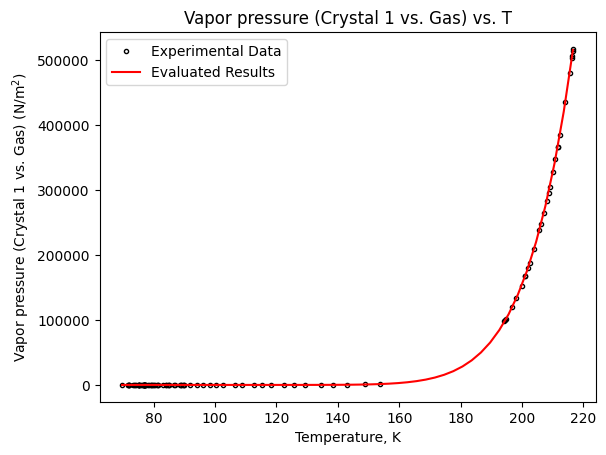

In [ ]:
data_vapor_press_cryst_vs_gas = """
106.46	0.1067
108.86	0.267
112.56	0.667
115.36	1.067
118.35	2.67
122.55	6.67
125.85	10.67
129.25	26.7
134.35	66.7
138.25	133.3
142.86	266.6
148.76	666.6
153.67	1333.22
194.74	101325
206.15	247132
208.01	283001
209	304279
210.85	347646
212.29	384427
201.86	179548
69.697	1.14791E-08
71.587	4.613E-08
71.637	7.1727E-08
71.847	8.6526E-08
71.897	1.08791E-07
71.997	1.15457E-07
73.107	1.7732E-07
73.537	1.13191E-07
74.027	1.7599E-07
74.137	1.33056E-07
74.918	3.7464E-07
75.138	5.5595E-07
75.138	5.5195E-07
75.138	5.2662E-07
75.138	4.5596E-07
75.368	4.6263E-07
75.938	6.2528E-07
76.288	5.3196E-07
76.538	7.9993E-07
76.758	6.3861E-07
76.868	1.13191E-06
76.928	1.10791E-06
76.928	6.8394E-07
76.928	6.2528E-07
76.928	5.3996E-07
76.928	5.3196E-07
77.048	1.1959E-06
77.048	1.19457E-06
77.048	1.19057E-06
77.228	1.05591E-06
77.348	9.4526E-07
78.008	1.7865E-06
78.628	2.0265E-06
79.058	2.5731E-06
79.188	3.3331E-06
79.368	3.613E-06
79.658	4.1197E-06
80.008	4.7729E-06
80.588	6.6395E-06
81.108	6.9594E-06
81.378	1.01458E-05
81.378	1.03192E-05
82.958	2.2931E-05
83.968	3.0264E-05
84.038	3.2797E-05
84.608	3.6797E-05
85.008	5.4396E-05
85.038	5.5062E-05
86.668	0.000105191
86.918	0.00013599
88.658	0.00025465
88.738	0.00026931
88.978	0.00026531
89.428	0.00038264
89.958	0.00042796
90.008	0.00043063
91.738	0.00099858
94.198	0.0024531
96.158	0.0049863
98.229	0.0105591
100.22	0.020665
102.51	0.04213
194.24	97700
194.58	100400
196.79	120100
198.16	134100
199.82	152700
201	167700
201.02	167900
202.52	188300
203.96	210000
205.65	238100
207.04	264000
208.61	295900
210.05	328100
211.58	365900
211.58	365900
214.07	435800
215.48	480300
216.18	503700
216.28	507200
216.48	514300
216.57	517400
"""

array_data = np.array([list(map(float, line.split())) for line in data_vapor_press_cryst_vs_gas.strip().split('\n')])

# Independent variable
T = array_data[:, 0]

# Dependent variable
vapor_press = array_data[:, 1]

plt.plot(T, vapor_press, 'k.', mfc = 'None', label = 'Experimental Data')

def calc_liq_vapor_press(T, *params):
  c1, c2, c3, c4, c5, c6, c7, c8 = params
  return np.exp( c1 + c2/T + c3*np.log(T) + c4*T + c5*T**2 + c6/T**2 + c7*T**6 + c8/T**4 )

"""
Name	    Description	                                Value	      Units
PSTDEPOL	TDE polynomials for solid vapor pressure	  -	          N/sqm
		                                                  32.02587	  Unitless
		                                               -3286.104	    K
		                                                  -0.6877939	Unitless
		                                                   0	        1/K
		                                                   0	        1/K**2
		                                                   0	        K**2
		                                                   0	        1/K**6
		                                                   0	        K**4
		                                                  69.697	    K
		                                                 216.57	      K
"""

coeffs = np.array([32.02587, -3286.104, -0.6877939, 0, 0, 0, 0, 0])
T_test = np.linspace(69.697, 216.57)

plt.plot(T_test, calc_liq_vapor_press(T_test, *coeffs), 'r', label = 'Evaluated Results')
plt.xlabel('Temperature, K')
plt.ylabel('Vapor pressure (Crystal 1 vs. Gas) (N/m$^2$)')
plt.title('Vapor pressure (Crystal 1 vs. Gas) vs. T')
plt.legend()

Extrapolate

0.049787068367863944
0.03249048461706369


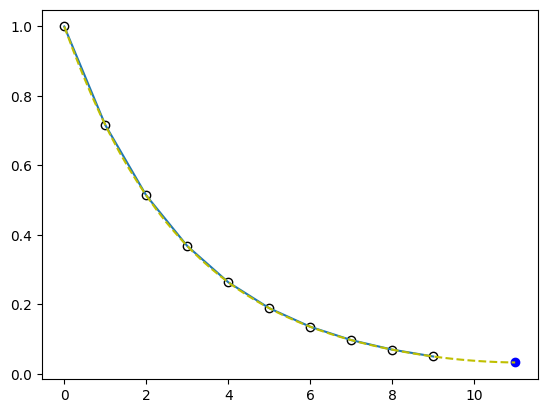

In [ ]:
import numpy as np
from scipy import interpolate

# quadratic, slinear, cubic, zero

x = np.arange(0,10)
y = np.exp(-x/3.0)
f = interpolate.interp1d(x, y, fill_value='extrapolate', kind = 'quadratic')

print(f(9))
print(f(11))

plt.plot(x, y, 'ko', mfc = 'None')
plt.plot(x, f(x))
plt.plot(11, f(11), 'bo')

plt.plot(np.linspace(0,11), f(np.linspace(0,11)), 'y--')